In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/home/mitraa/Jupyter Notebook/covid-19_trendAnalysis/covid_19_clean_complete_2022.csv')

In [7]:
df.head(10)

Province              Country        Date  Confirmed  \
0                           NaN          Afghanistan  2020-01-22          0   
1                           NaN              Albania  2020-01-22          0   
2                           NaN              Algeria  2020-01-22          0   
3                           NaN              Andorra  2020-01-22          0   
4                           NaN               Angola  2020-01-22          0   
5                           NaN           Antarctica  2020-01-22          0   
6                           NaN  Antigua and Barbuda  2020-01-22          0   
7                           NaN            Argentina  2020-01-22          0   
8                           NaN              Armenia  2020-01-22          0   
9  Australian Capital Territory            Australia  2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  
5       0          0  
6       0          0  
7       0          0  
8       0          0  
9       0          0

In [5]:
df.drop(['Lat','Long','WHO Region','Active'],axis=1,inplace=True)

In [6]:
df.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace=True)

In [8]:
# to impute missing values
#another way is df.fillna('NA')
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [10]:
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [11]:
df3.head(20)

Country        Date  Confirmed  Deaths  Recovered
0   Afghanistan  2020-01-22          0       0          0
1   Afghanistan  2020-01-23          0       0          0
2   Afghanistan  2020-01-24          0       0          0
3   Afghanistan  2020-01-25          0       0          0
4   Afghanistan  2020-01-26          0       0          0
5   Afghanistan  2020-01-27          0       0          0
6   Afghanistan  2020-01-28          0       0          0
7   Afghanistan  2020-01-29          0       0          0
8   Afghanistan  2020-01-30          0       0          0
9   Afghanistan  2020-01-31          0       0          0
10  Afghanistan  2020-02-01          0       0          0
11  Afghanistan  2020-02-02          0       0          0
12  Afghanistan  2020-02-03          0       0          0
13  Afghanistan  2020-02-04          0       0          0
14  Afghanistan  2020-02-05          0       0          0
15  Afghanistan  2020-02-06          0       0          0
16  Afghanistan  2020-02-07          0       0          0
17  Afghanistan  2020-02-08          0       0          0
18  Afghanistan  2020-02-09          0       0          0
19  Afghanistan  2020-02-10          0       0          0

In [12]:
countries = df3['Country'].unique()
len(countries)

197

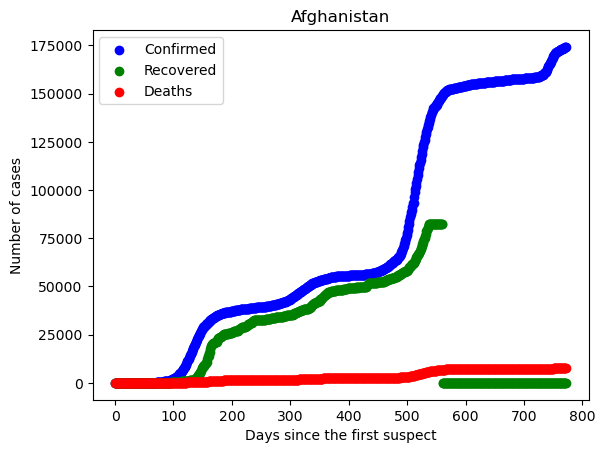

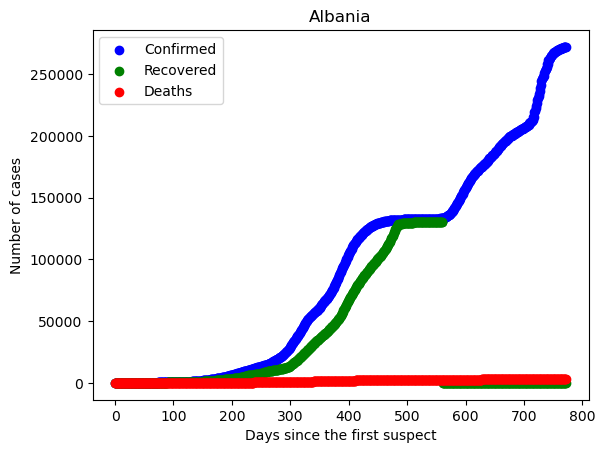

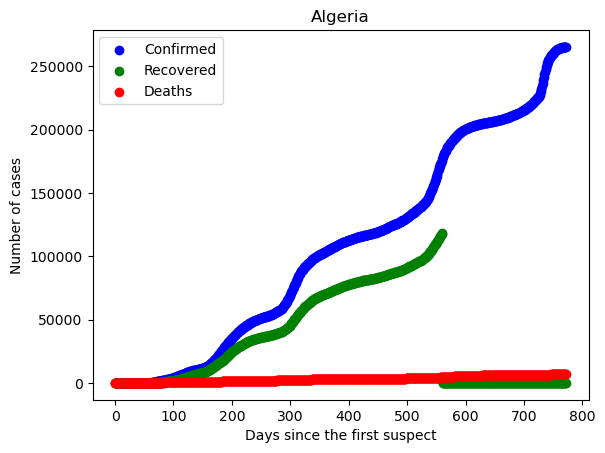

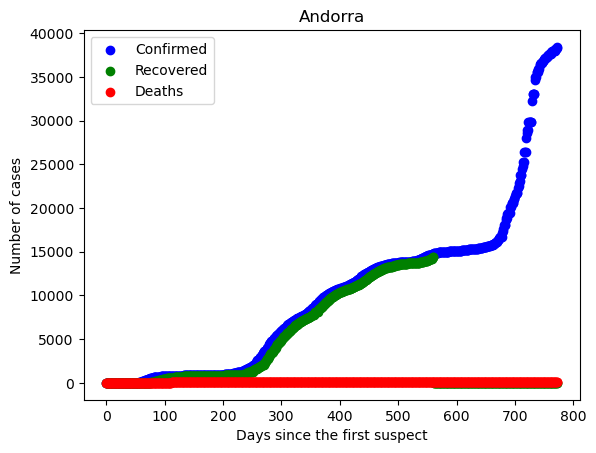

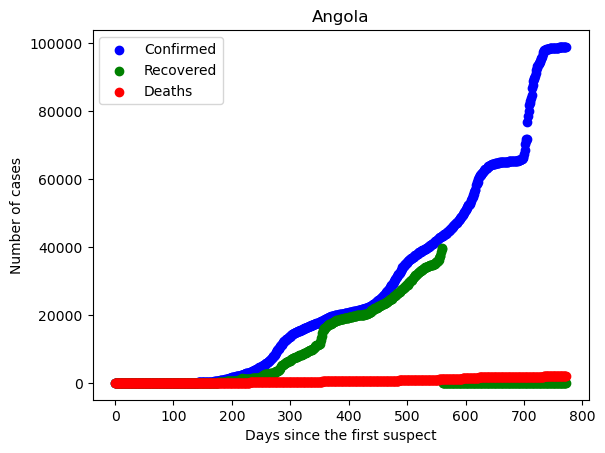

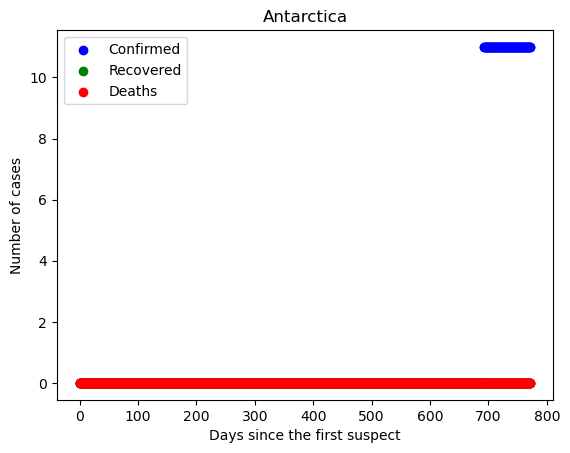

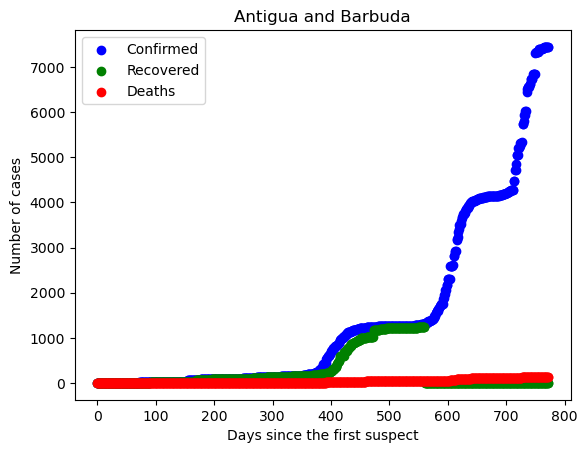

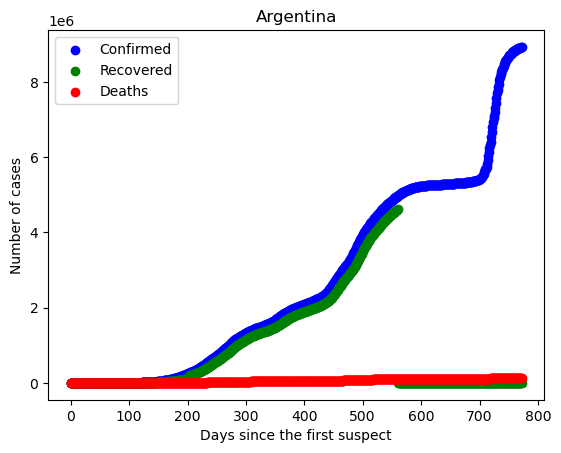

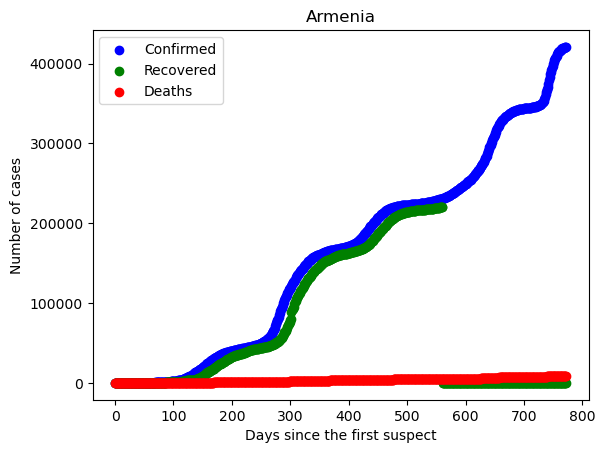

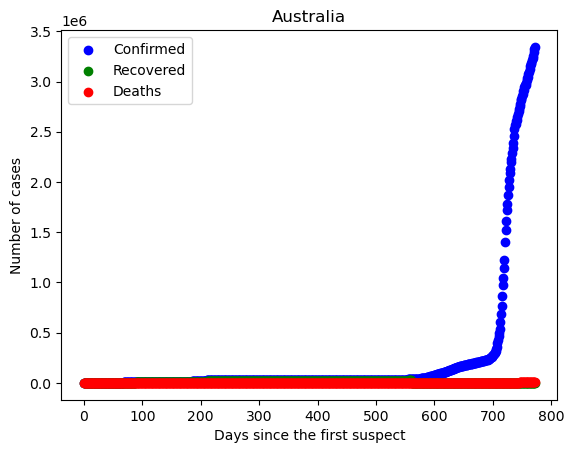

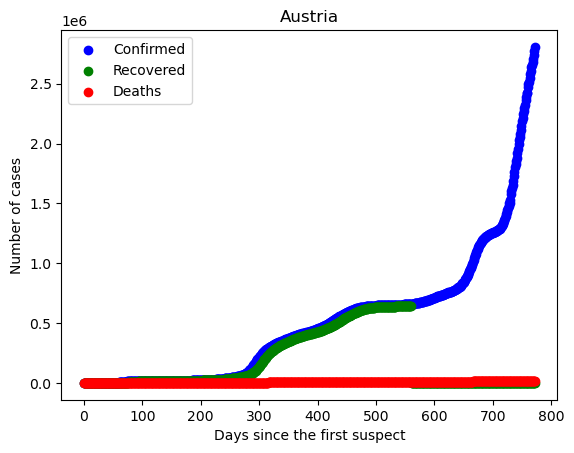

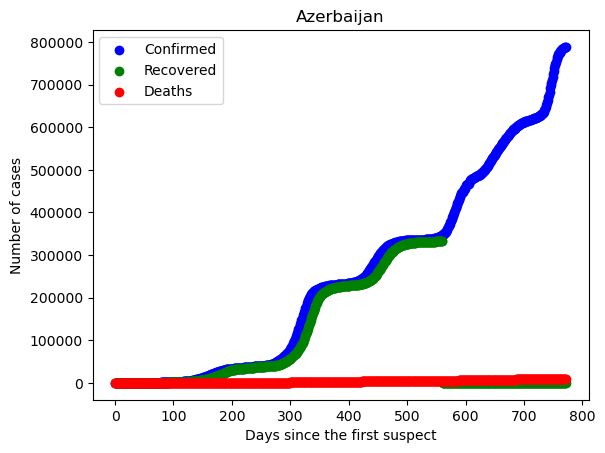

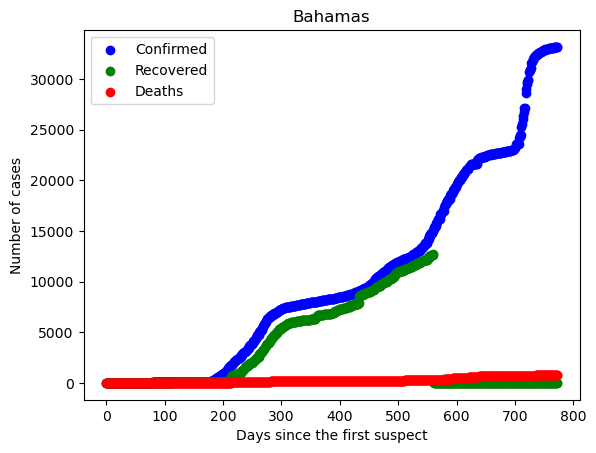

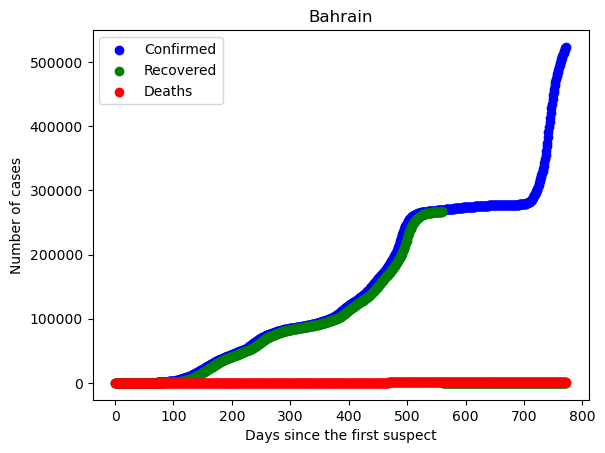

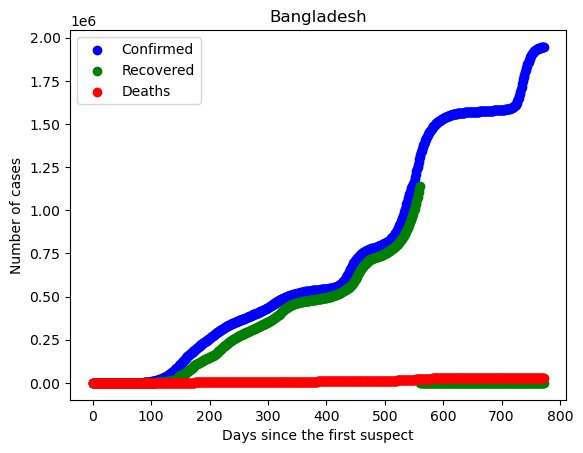

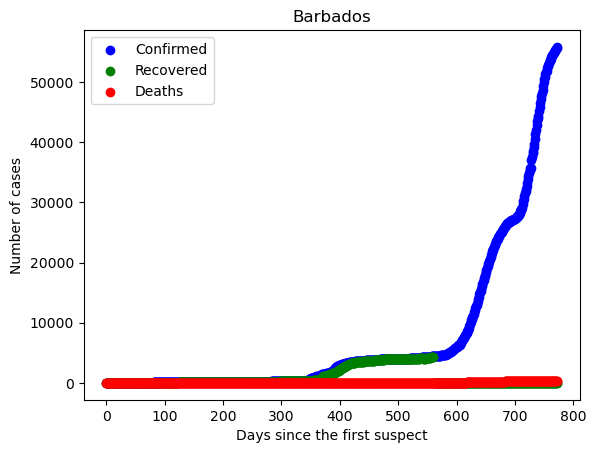

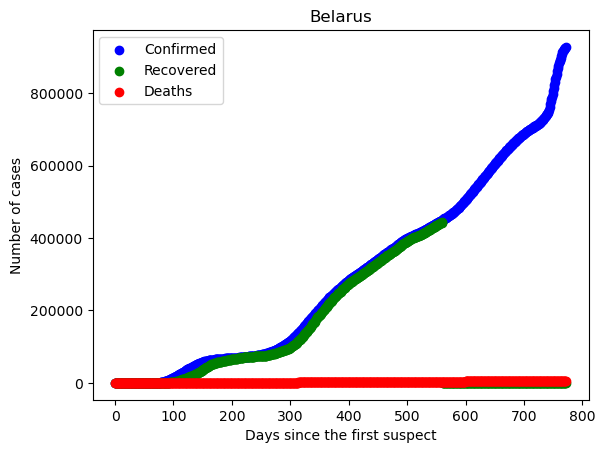

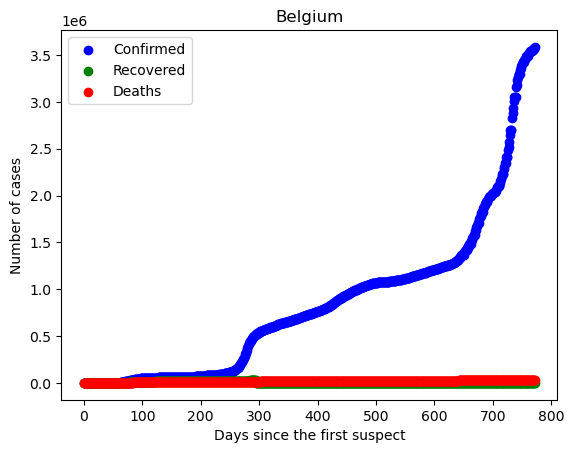

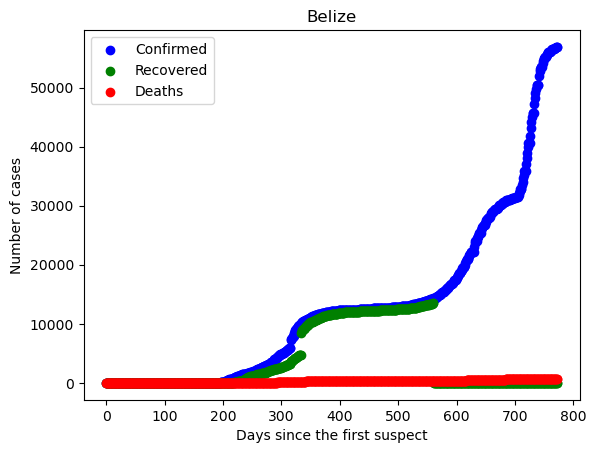

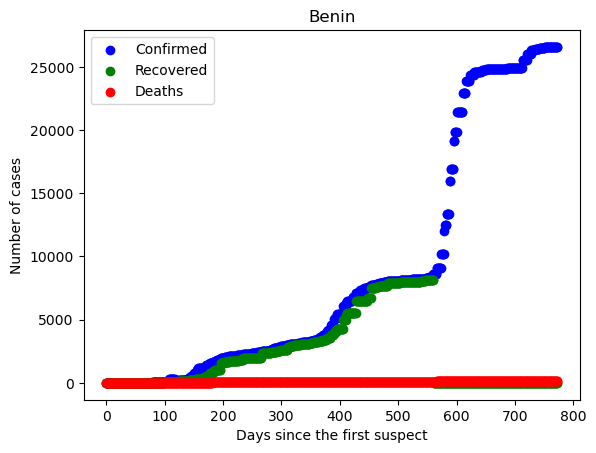

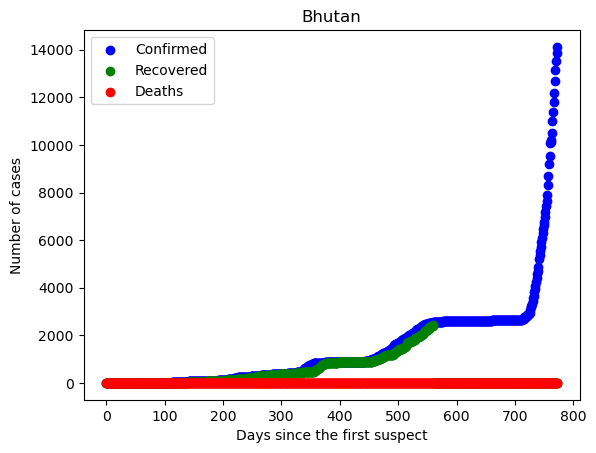

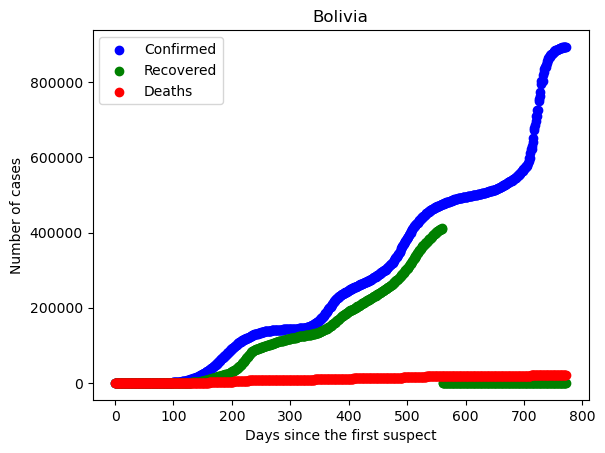

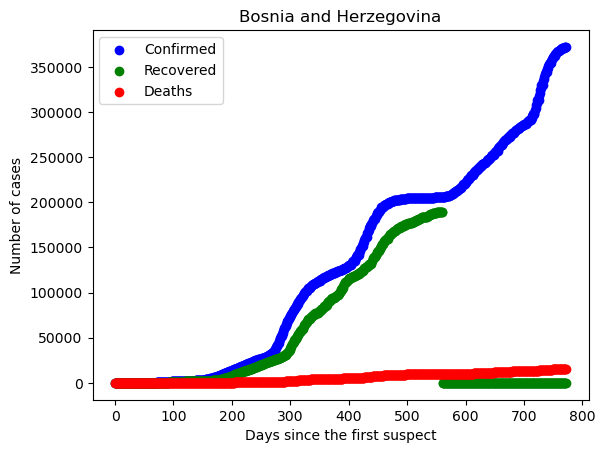

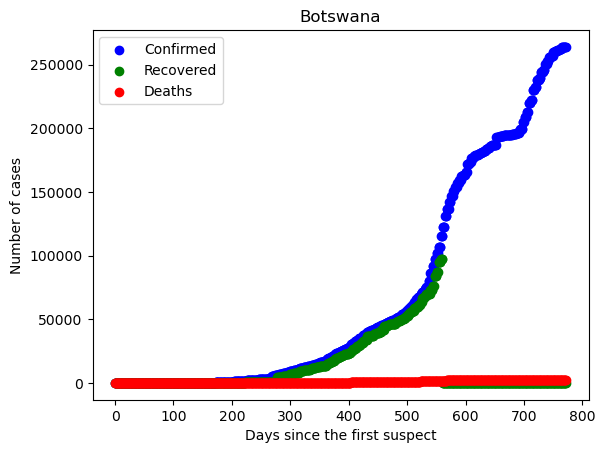

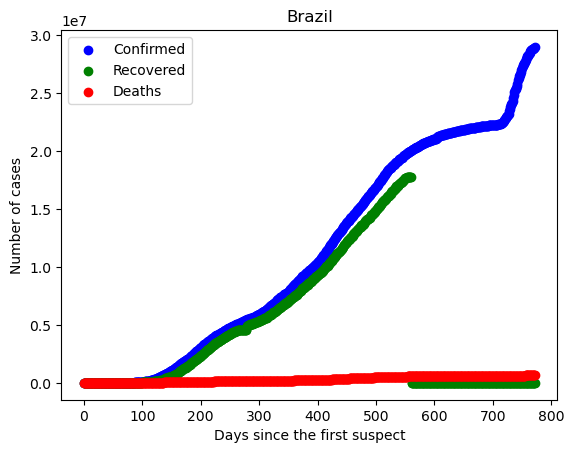

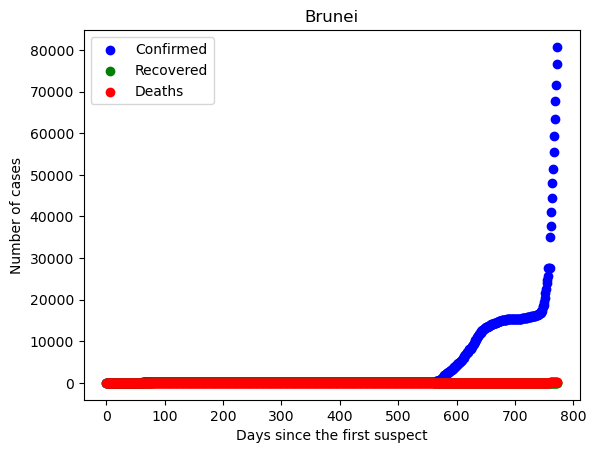

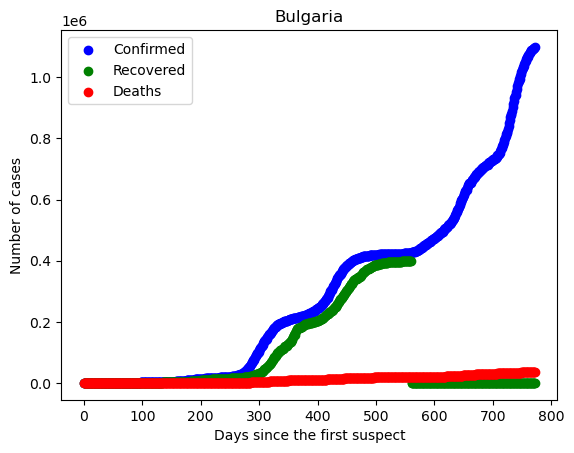

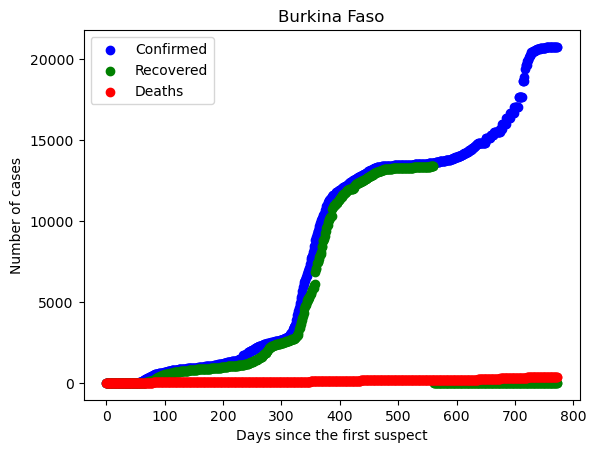

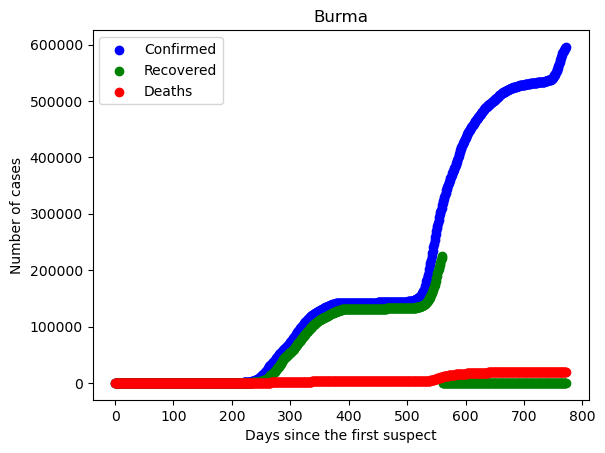

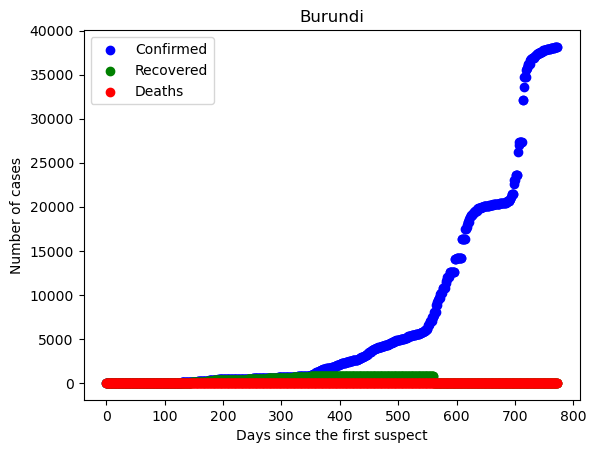

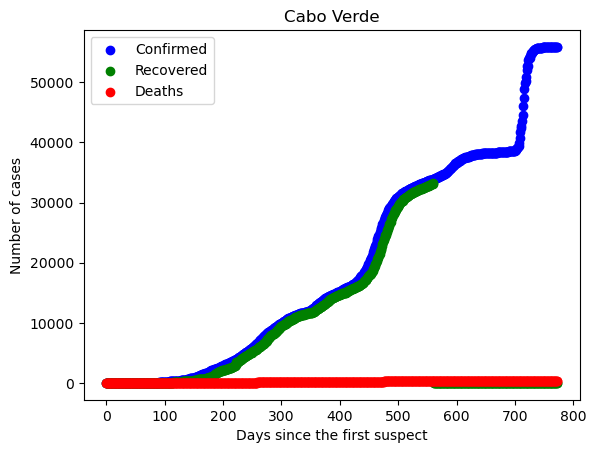

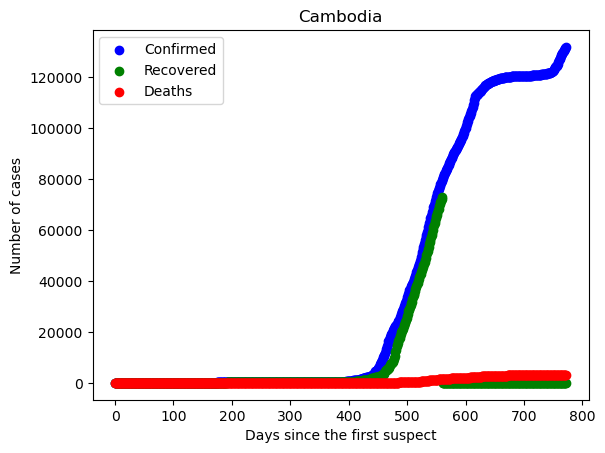

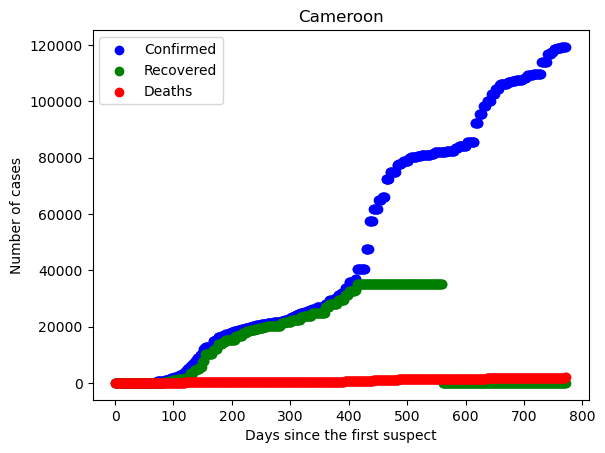

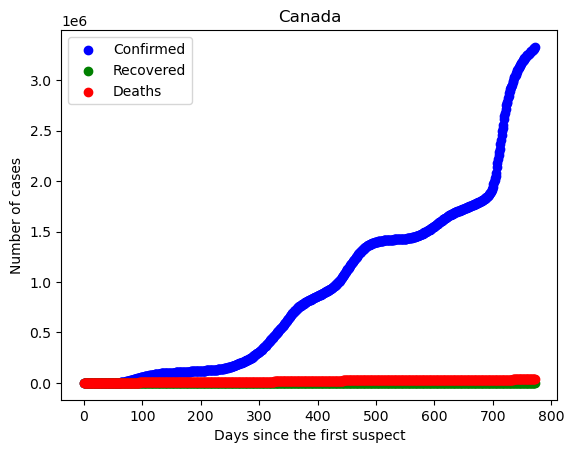

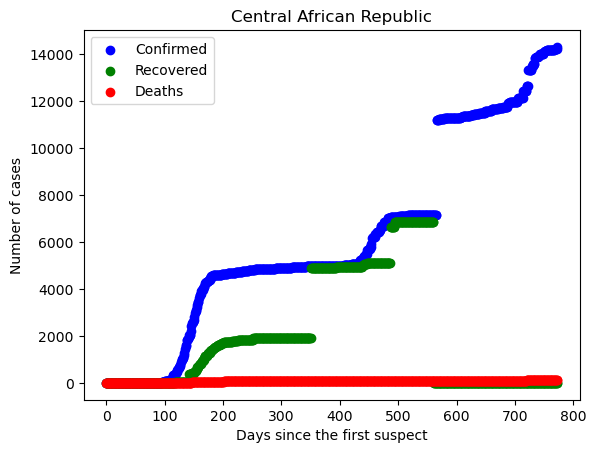

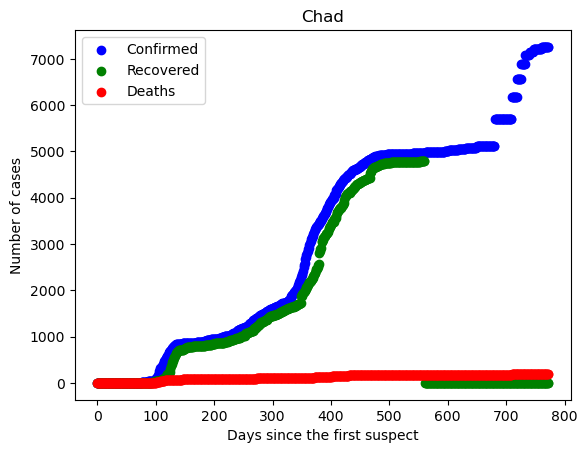

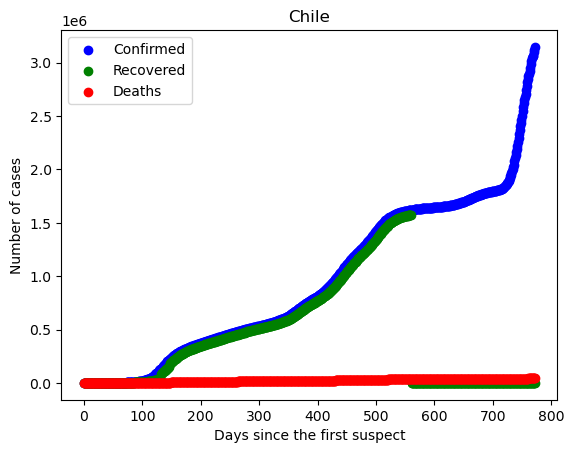

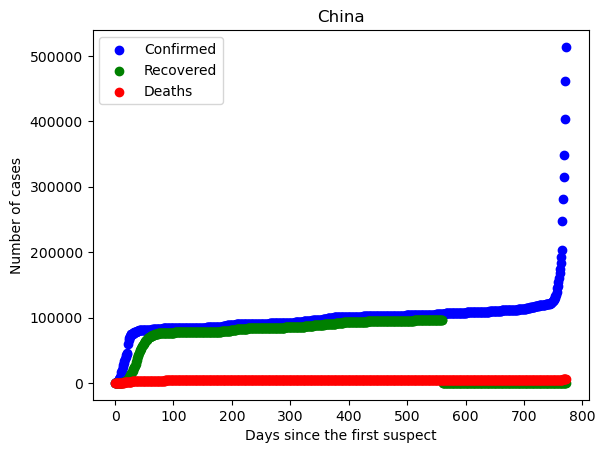

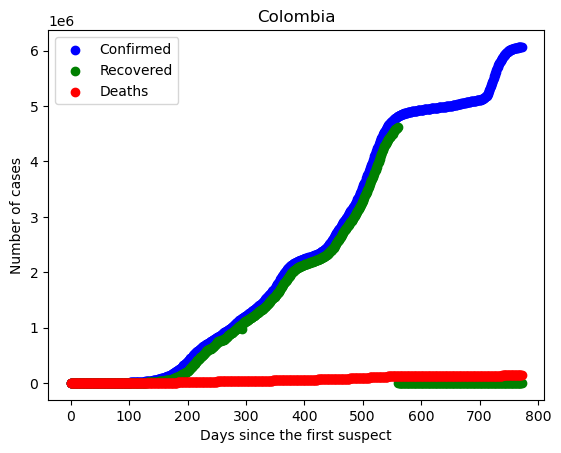

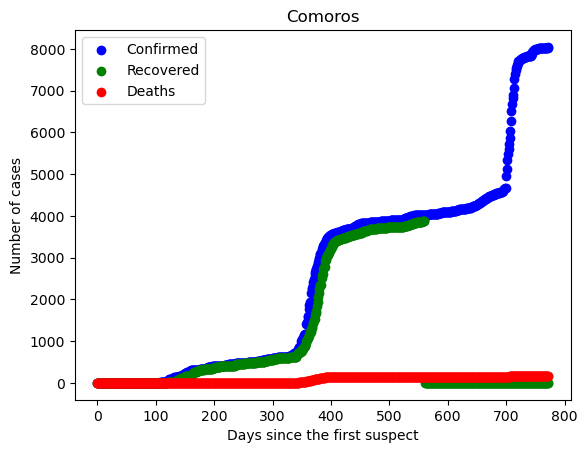

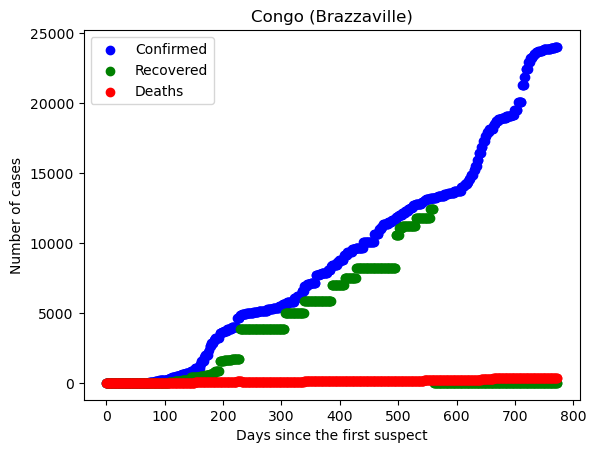

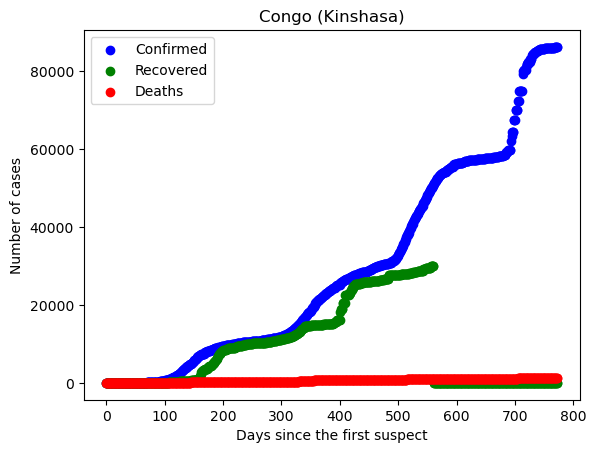

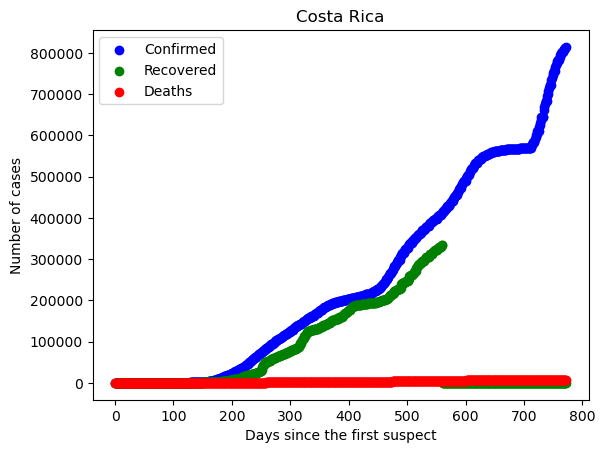

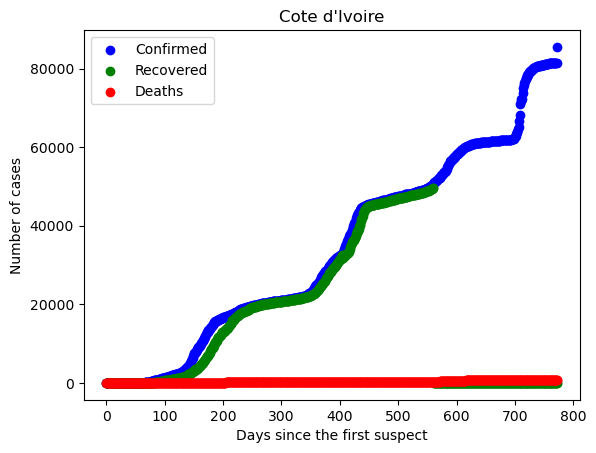

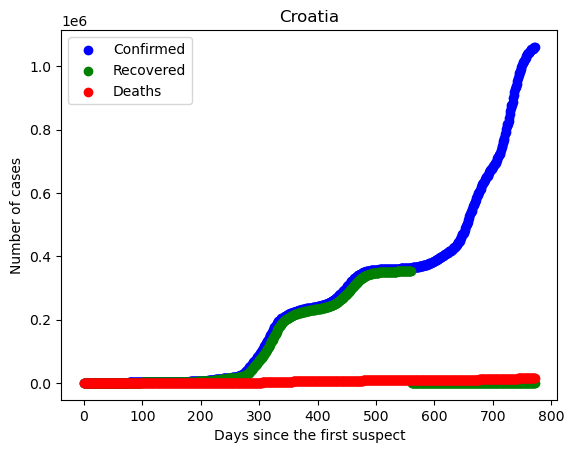

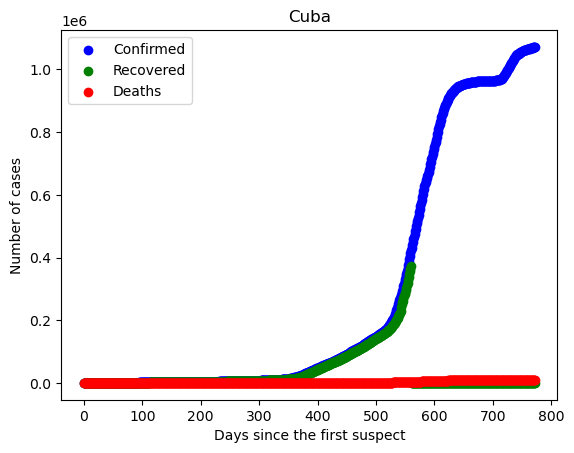

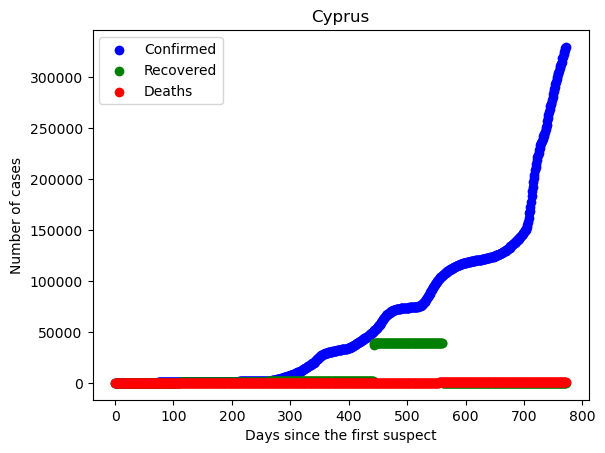

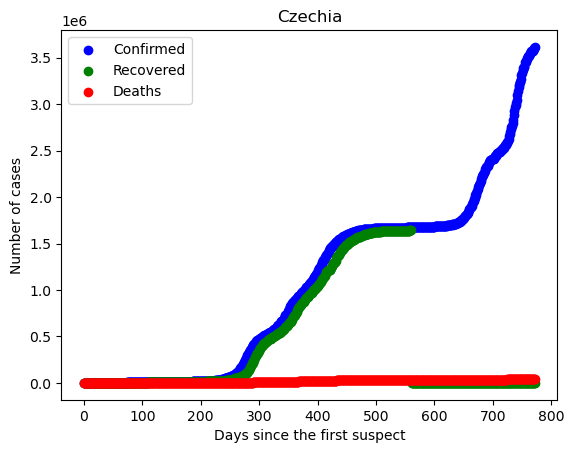

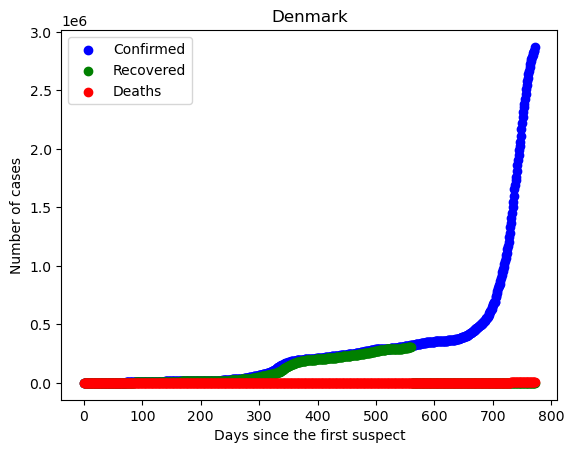

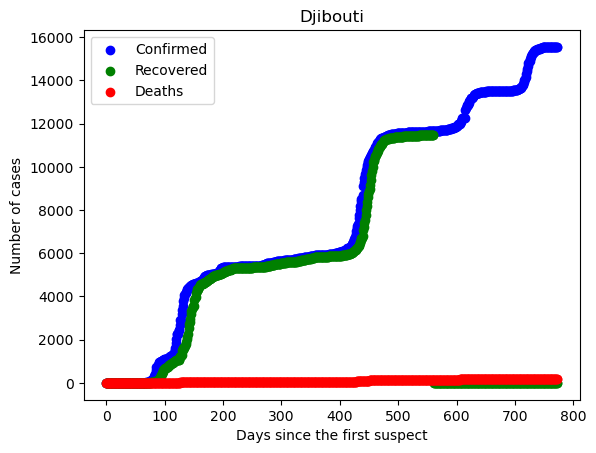

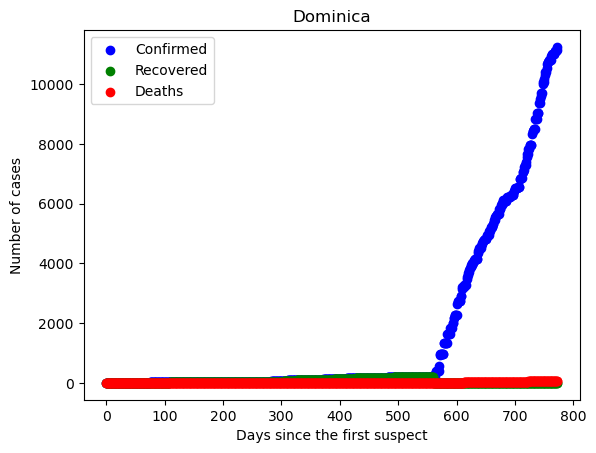

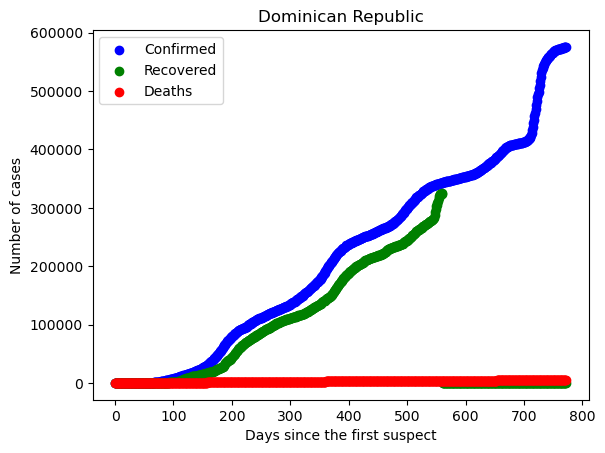

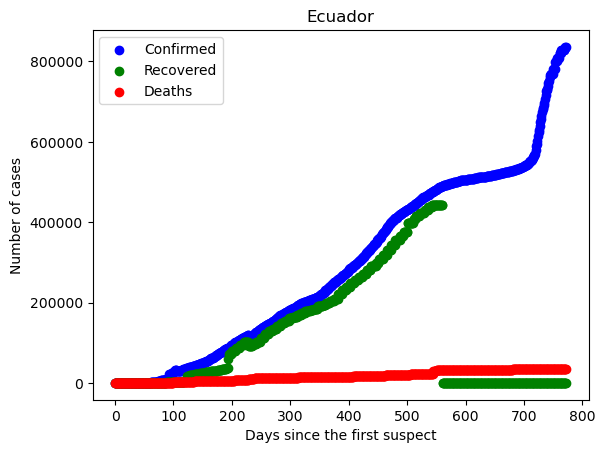

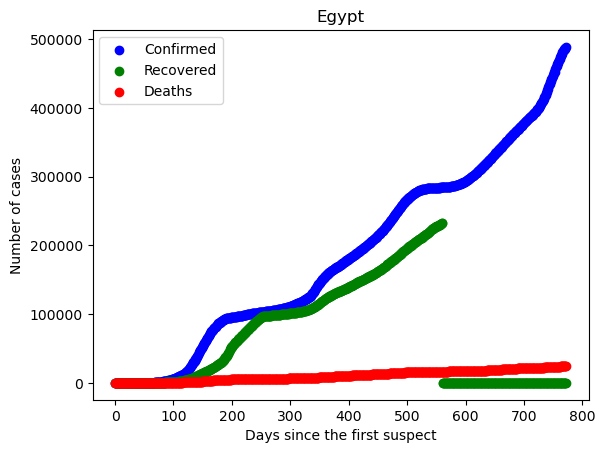

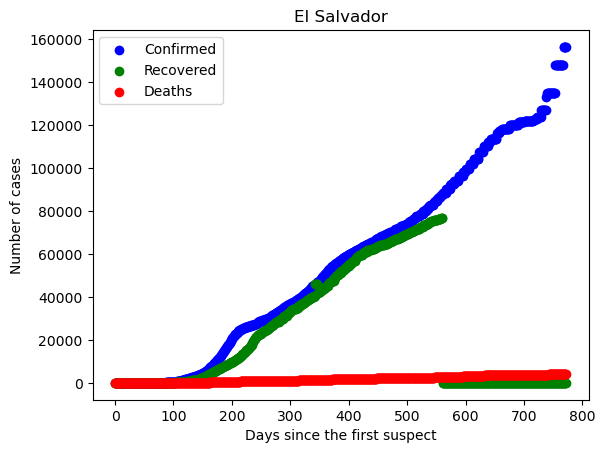

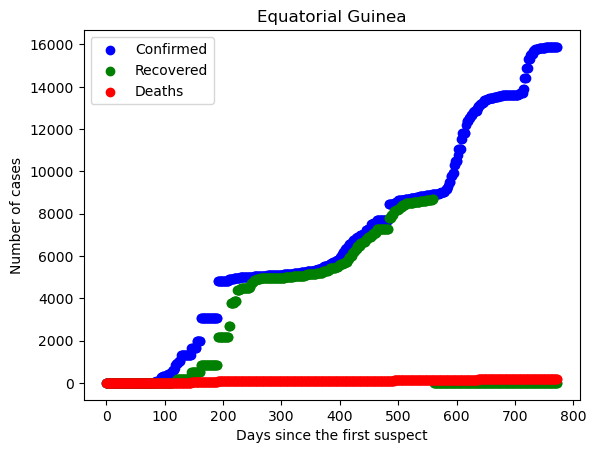

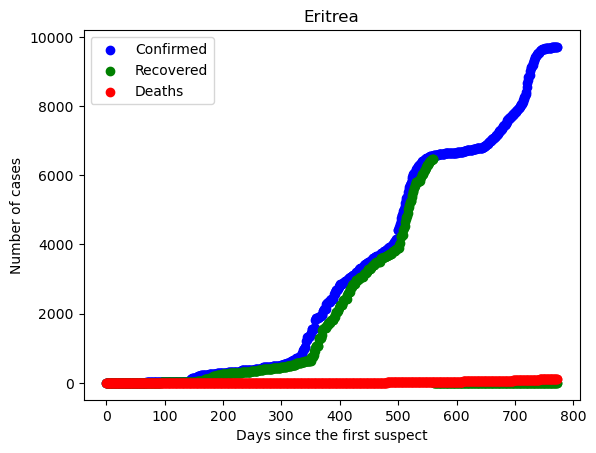

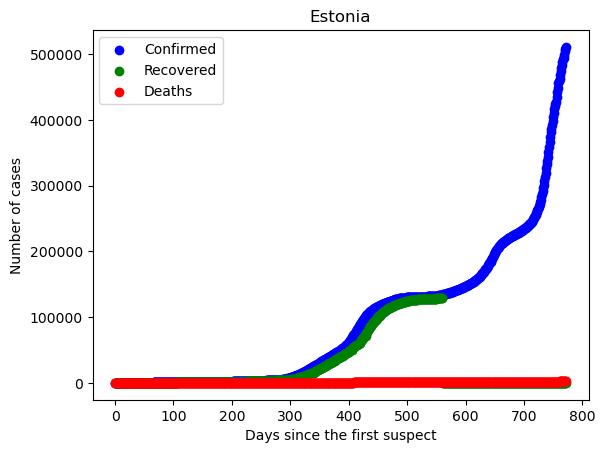

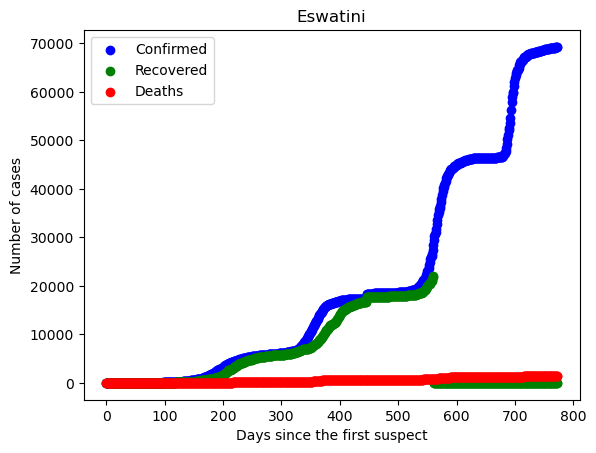

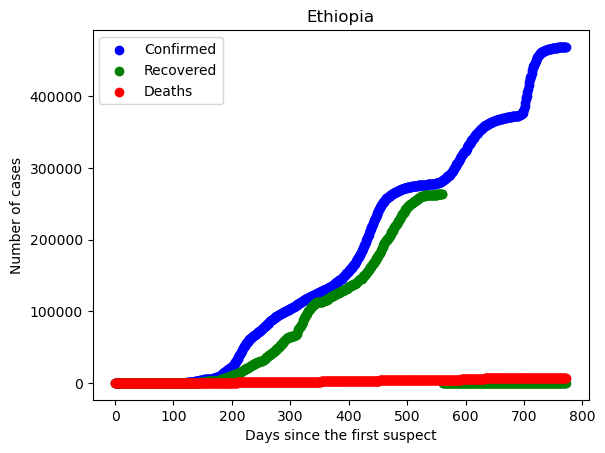

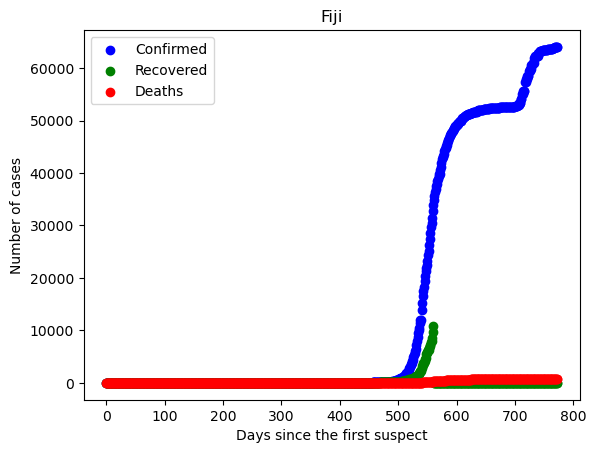

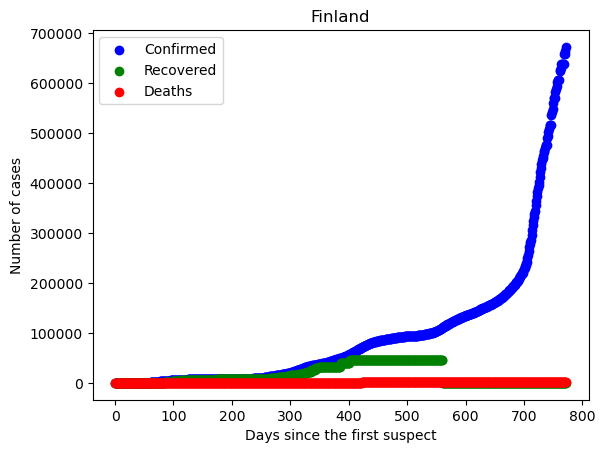

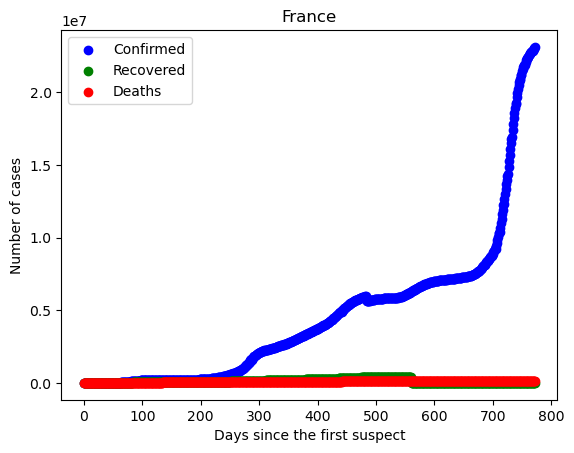

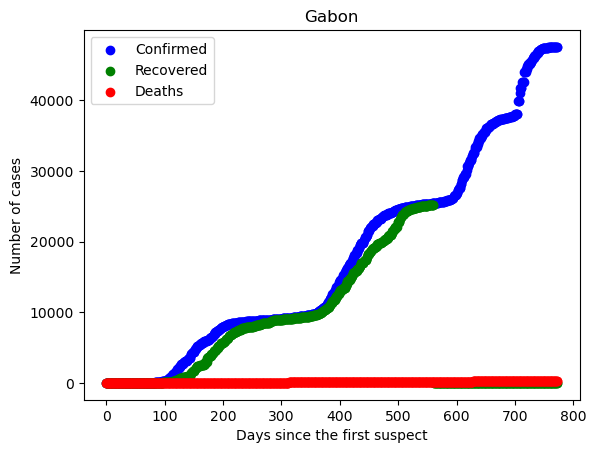

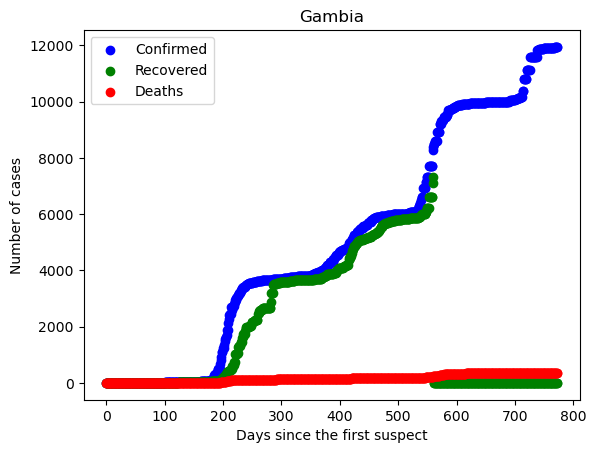

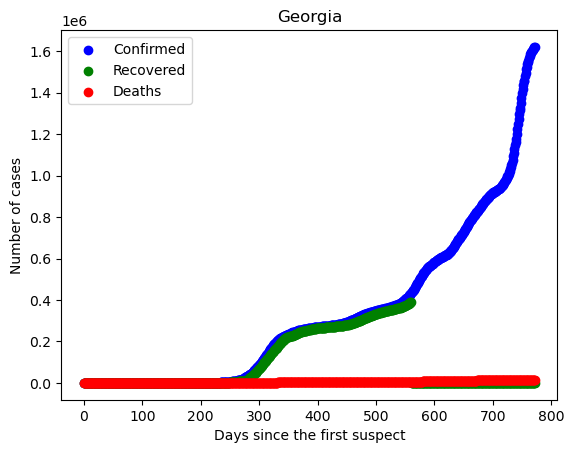

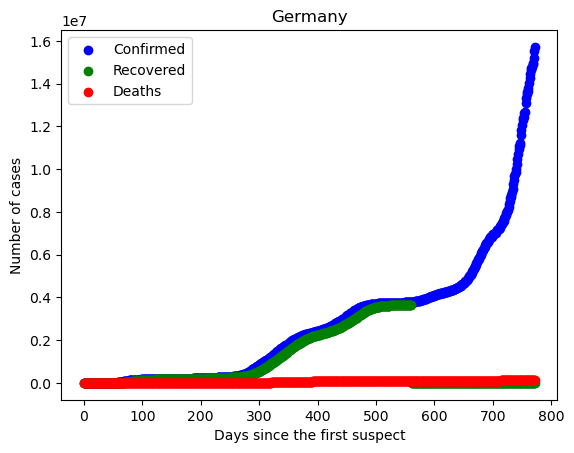

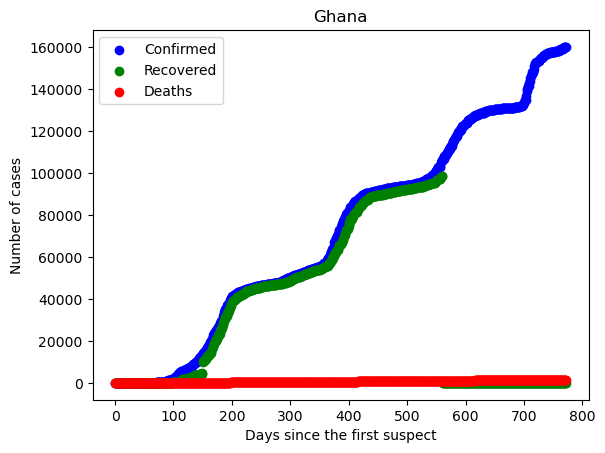

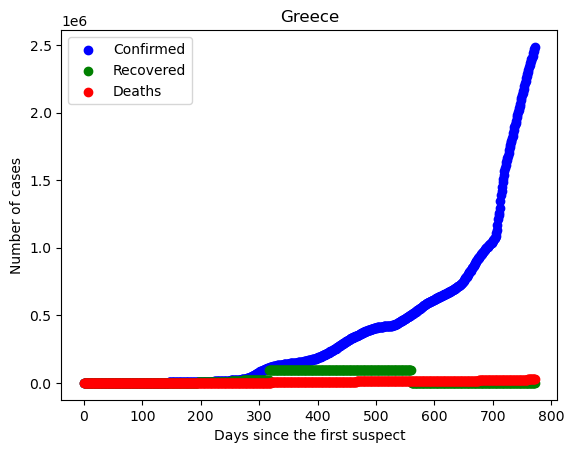

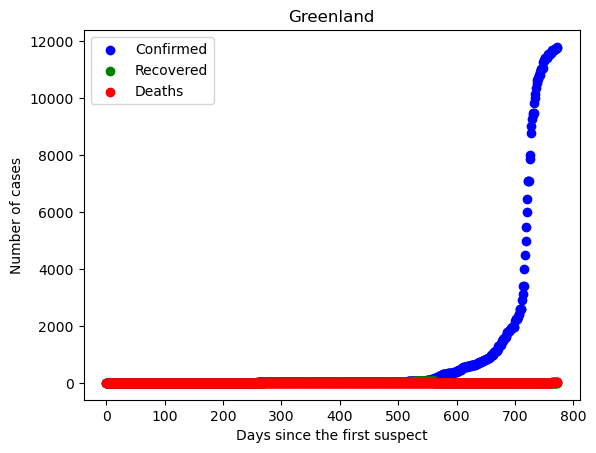

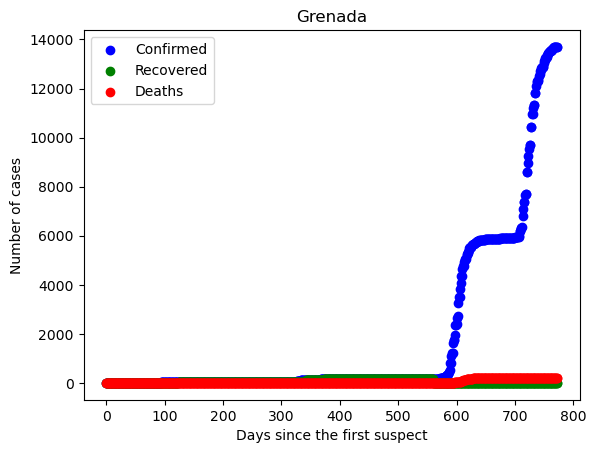

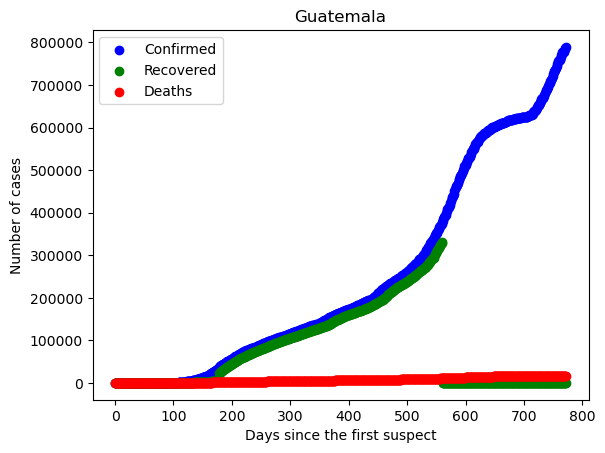

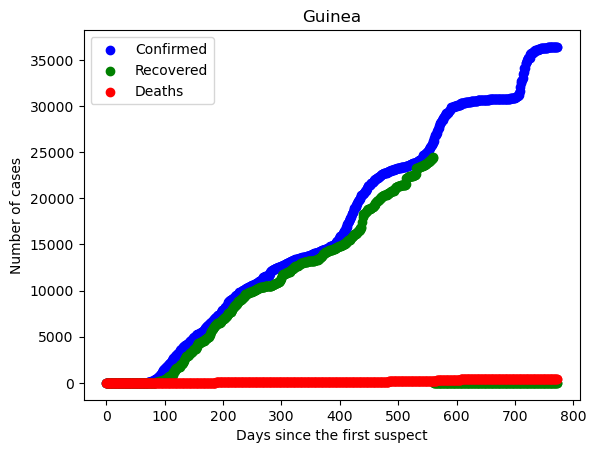

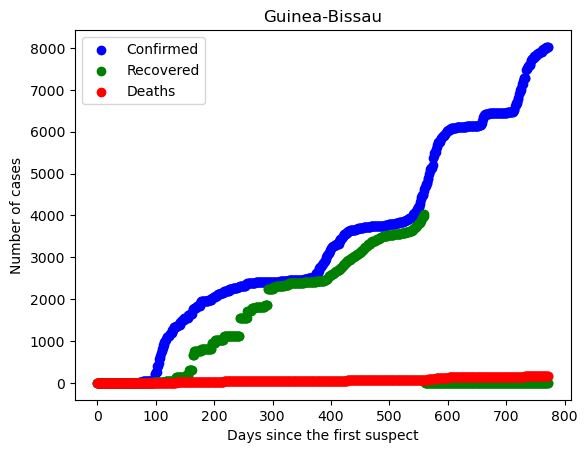

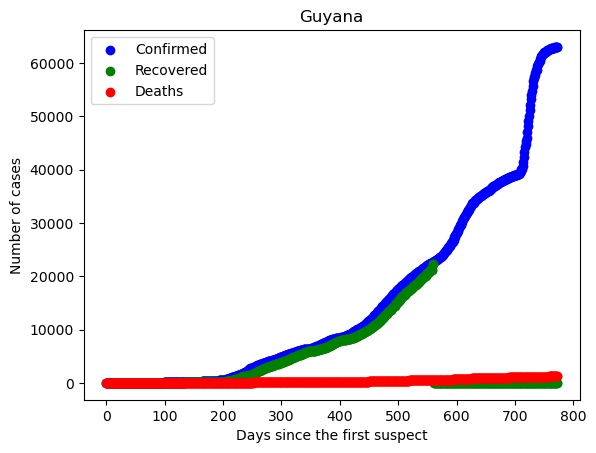

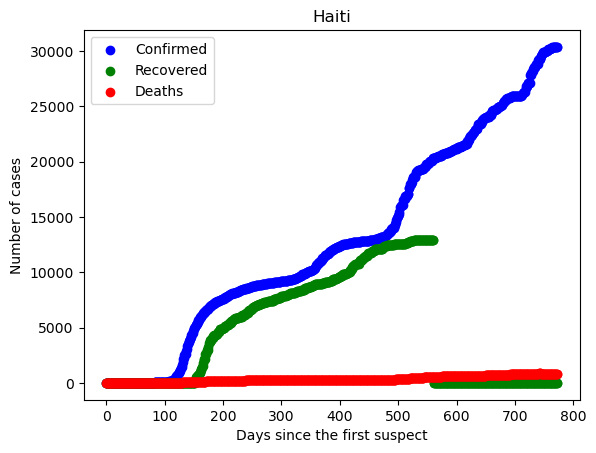

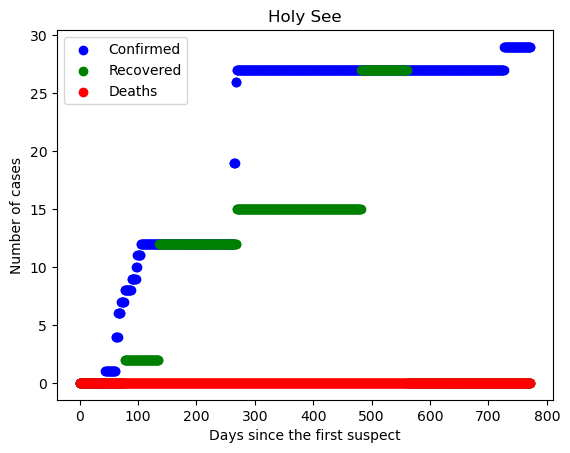

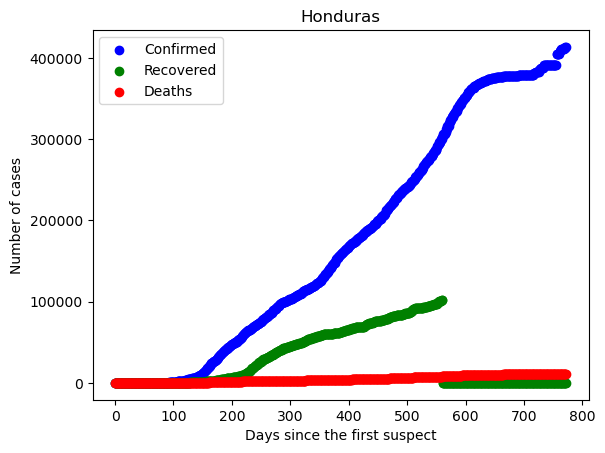

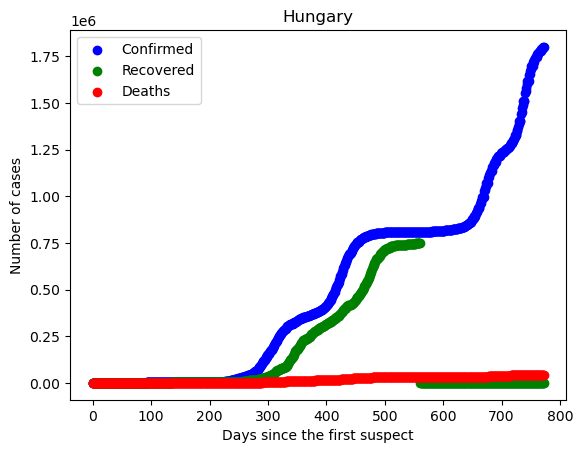

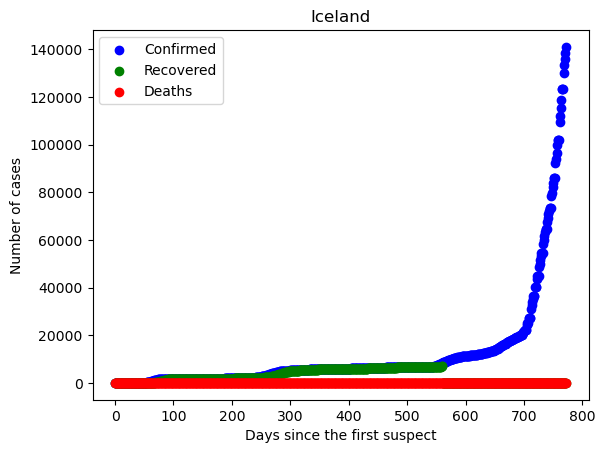

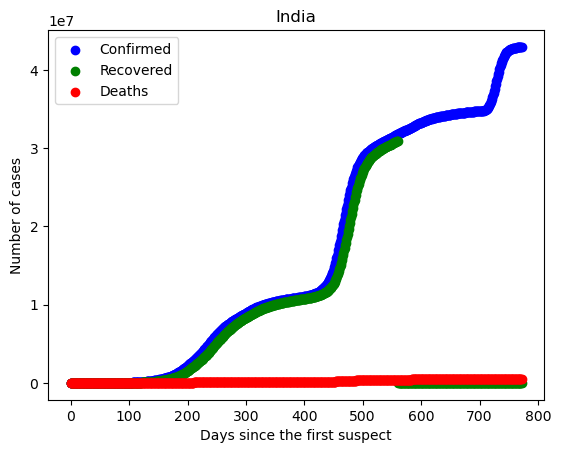

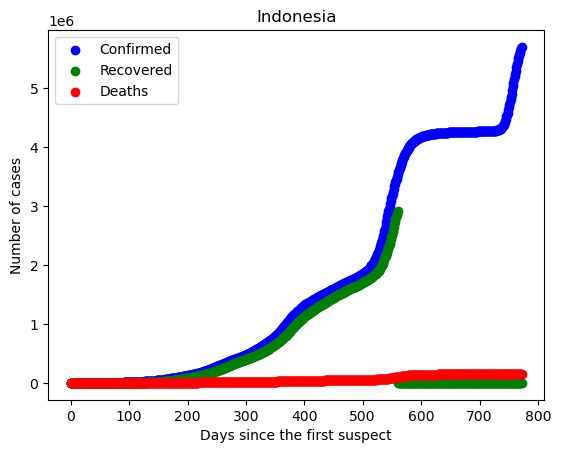

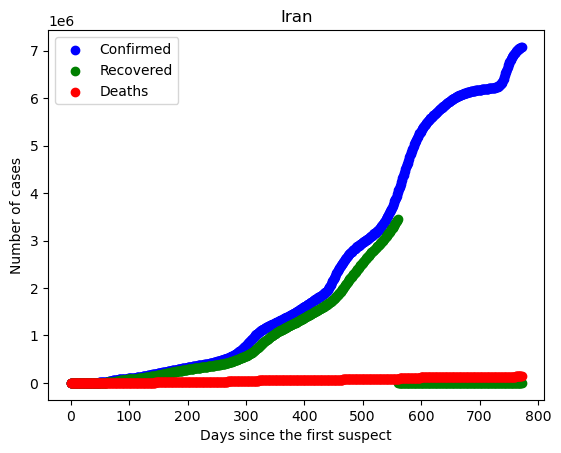

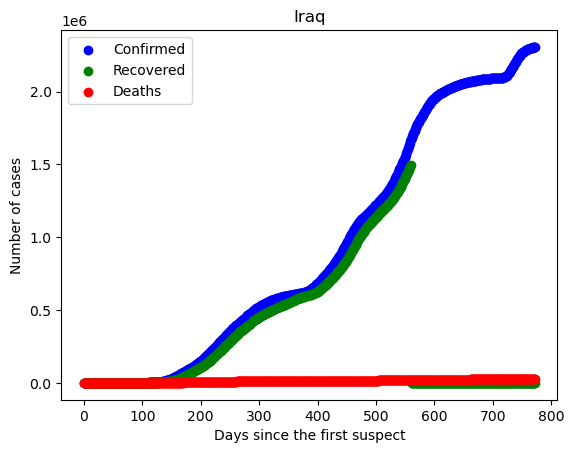

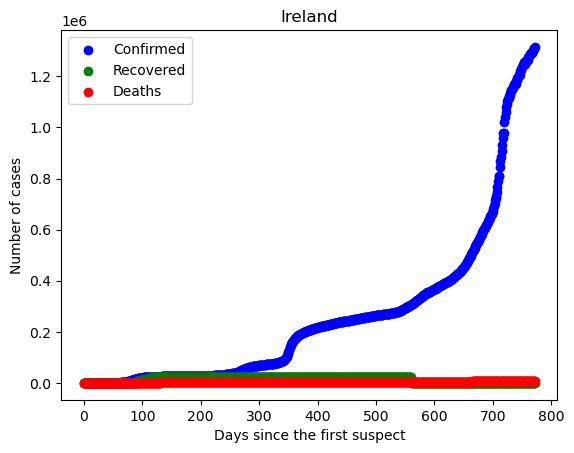

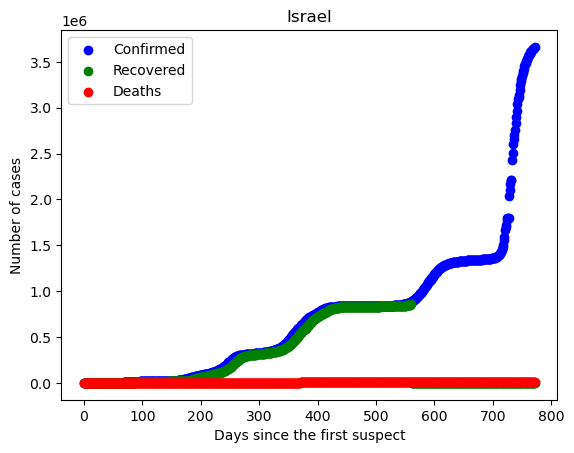

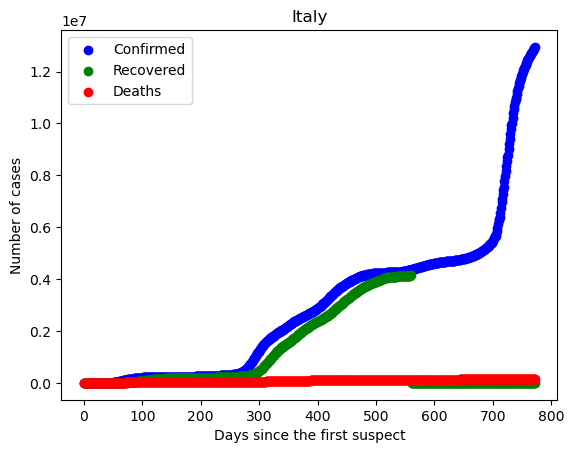

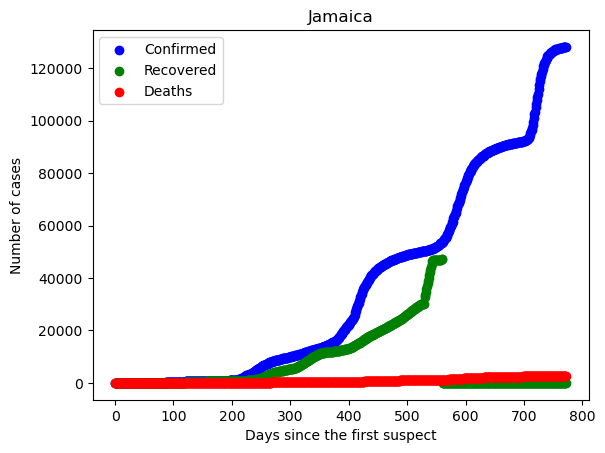

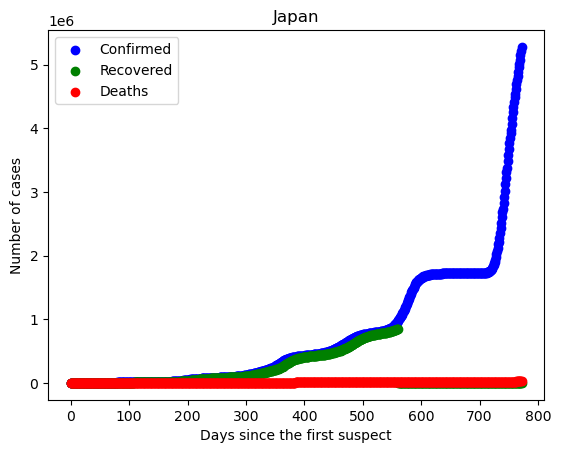

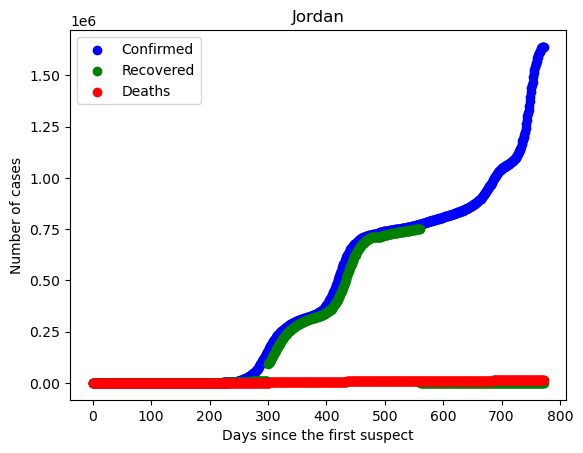

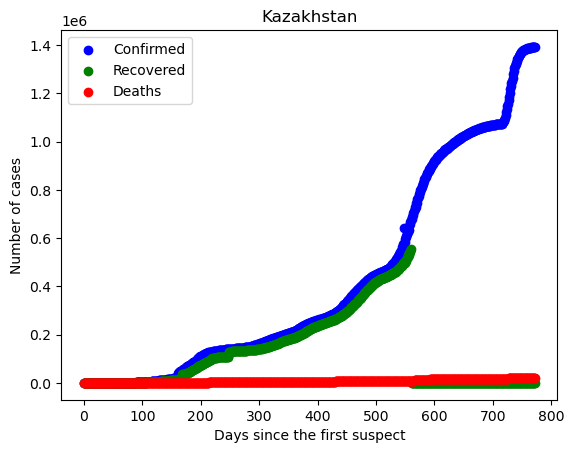

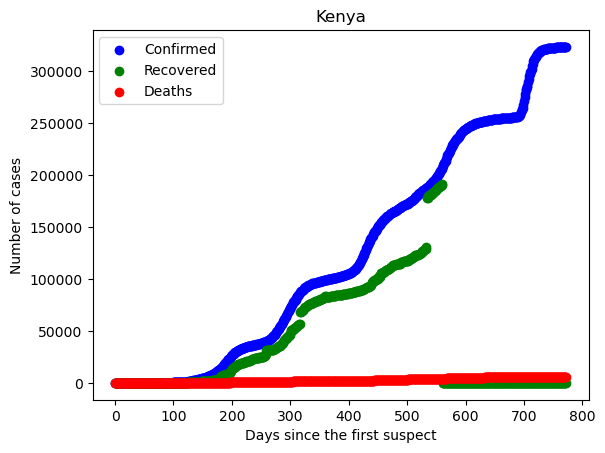

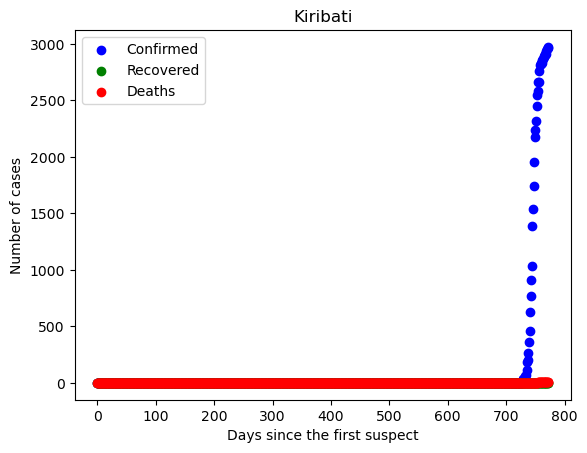

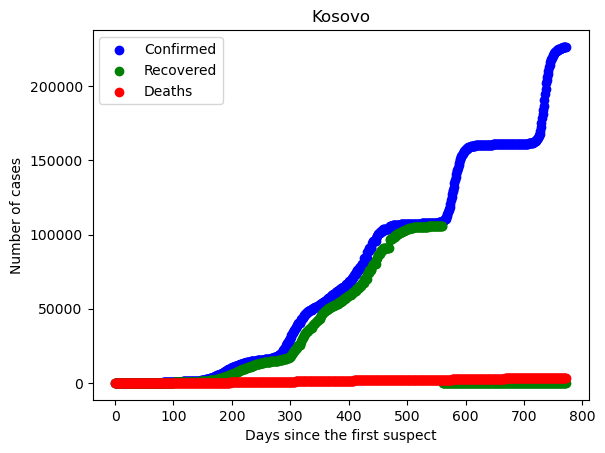

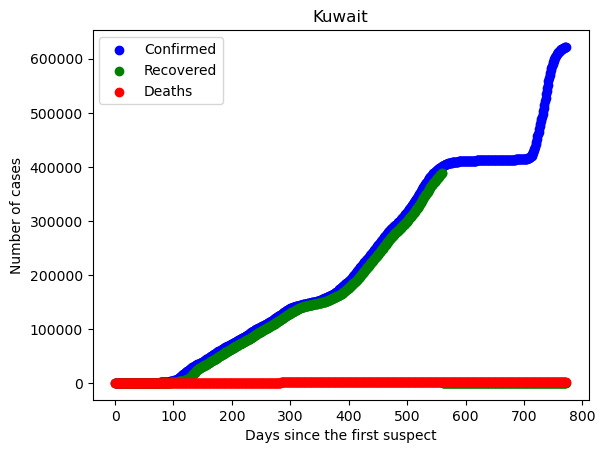

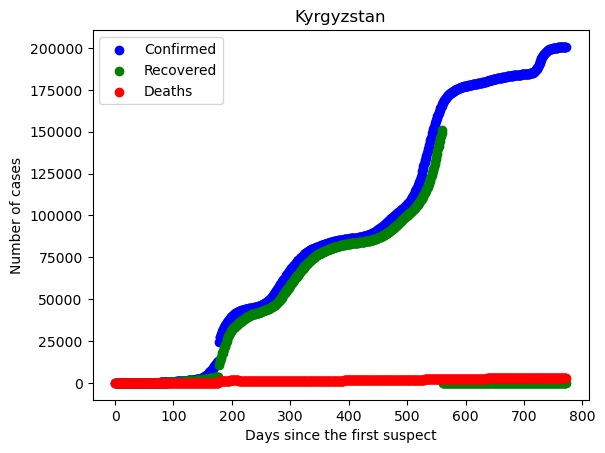

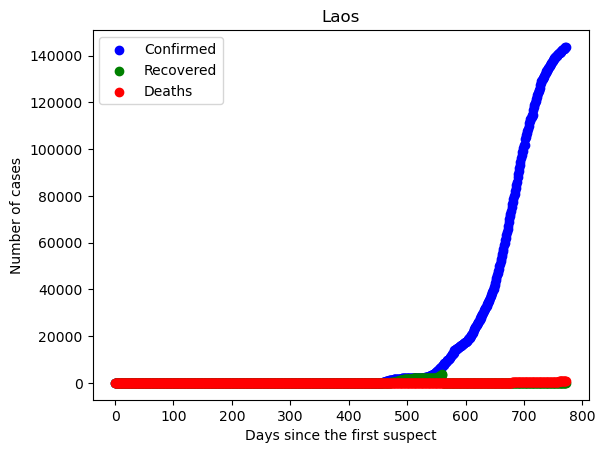

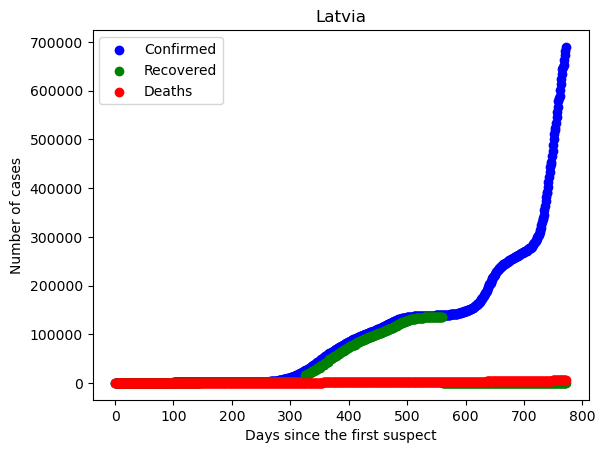

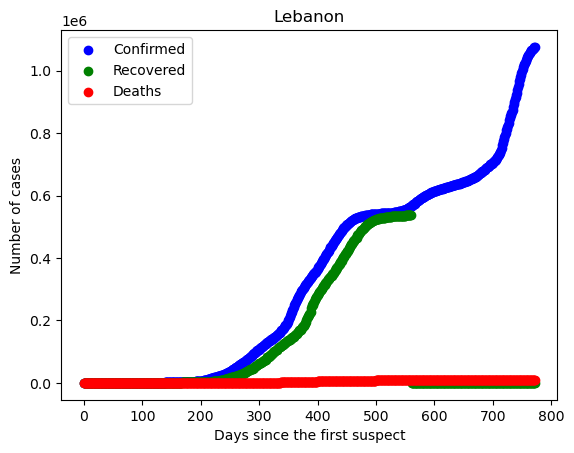

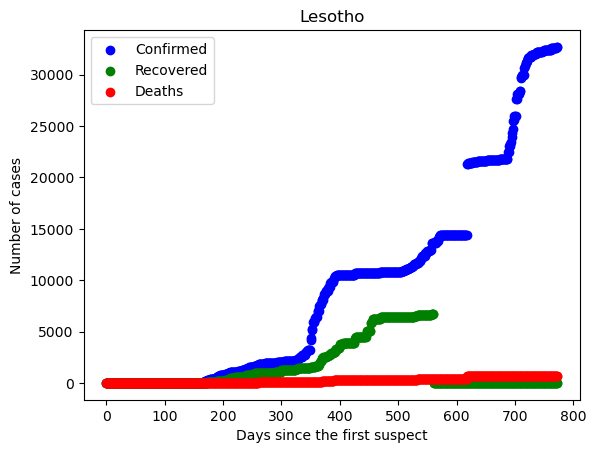

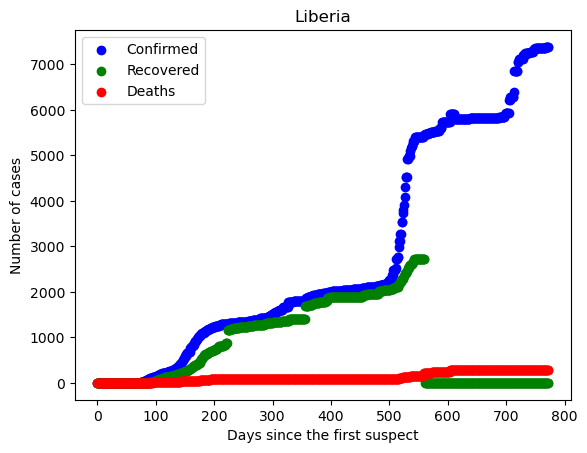

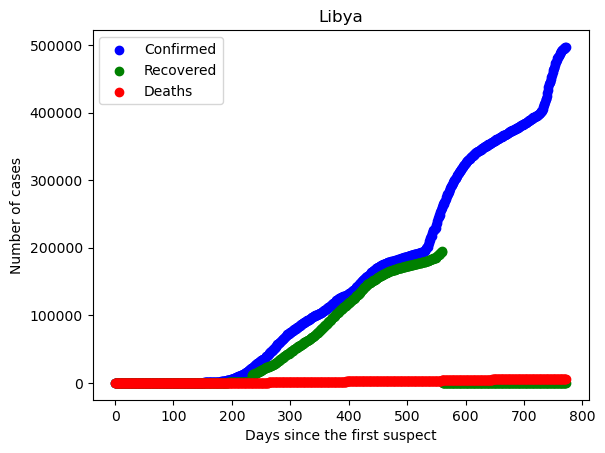

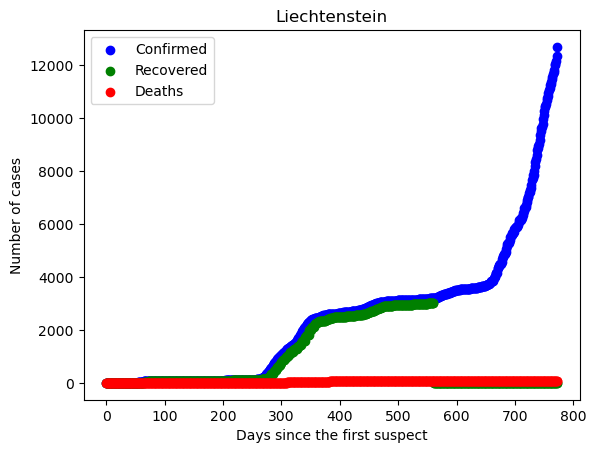

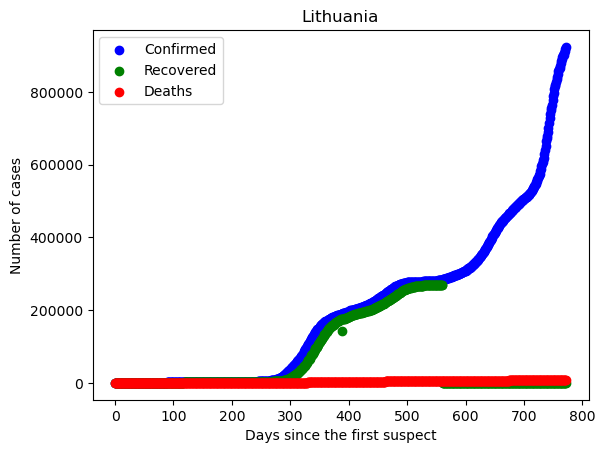

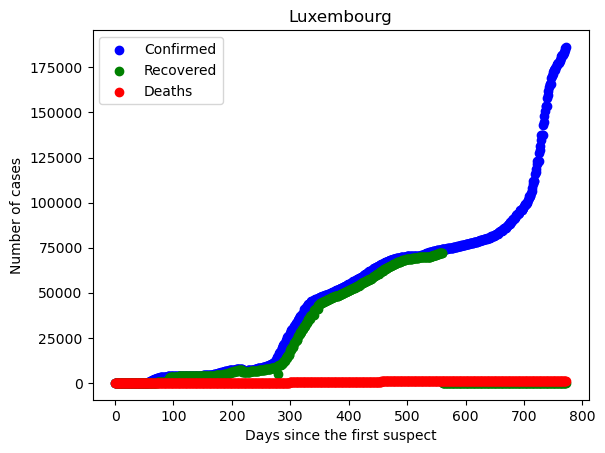

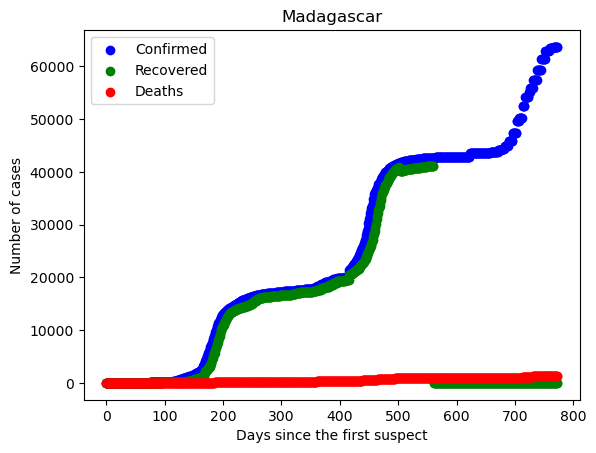

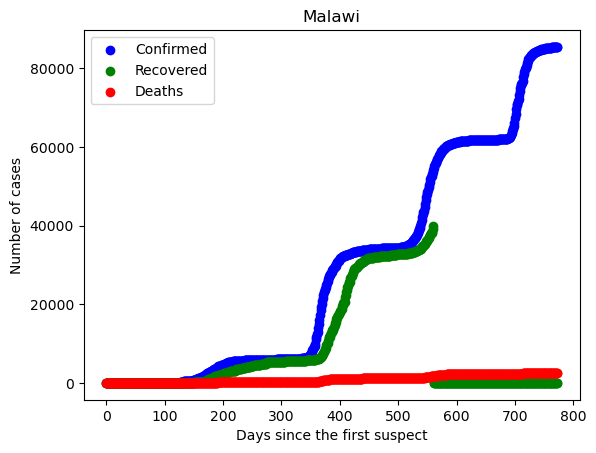

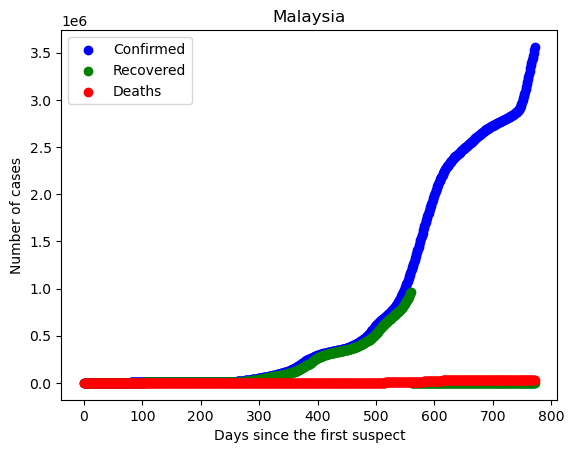

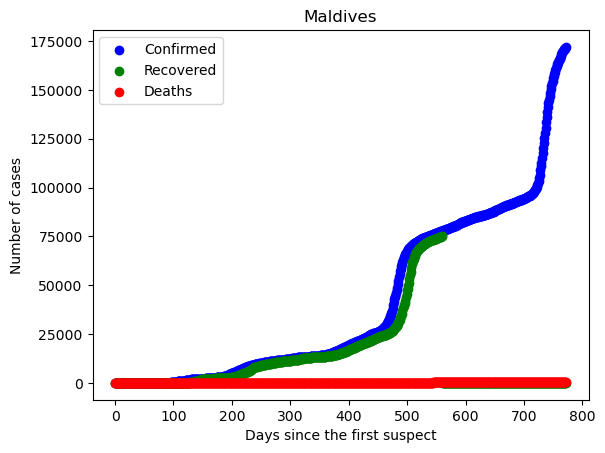

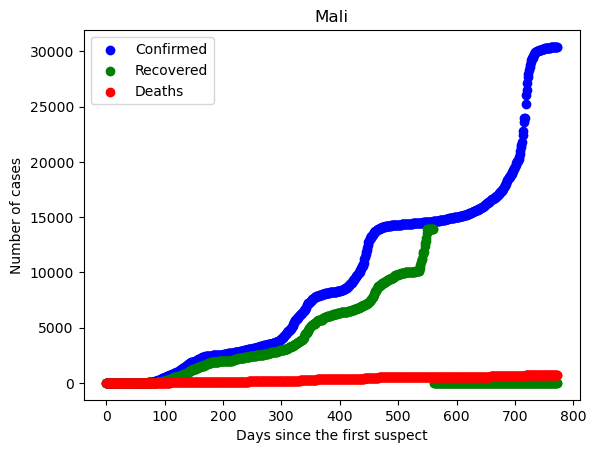

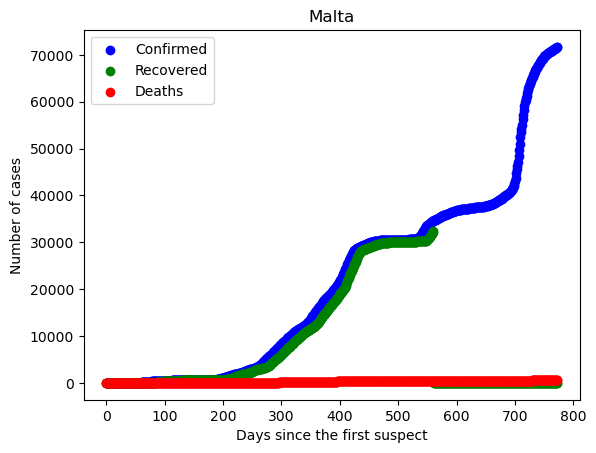

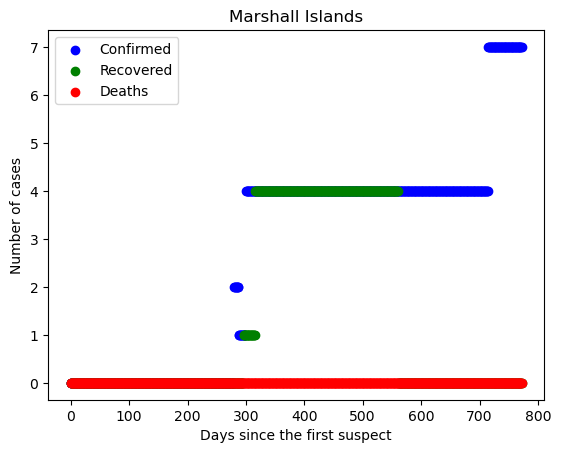

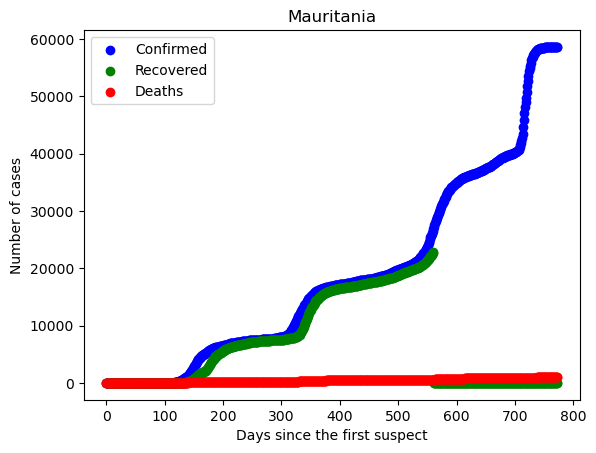

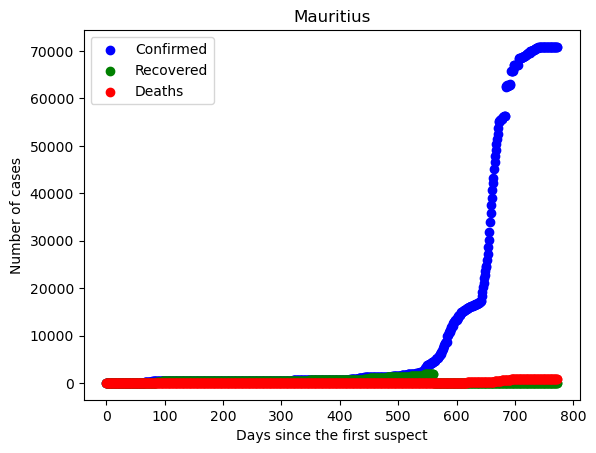

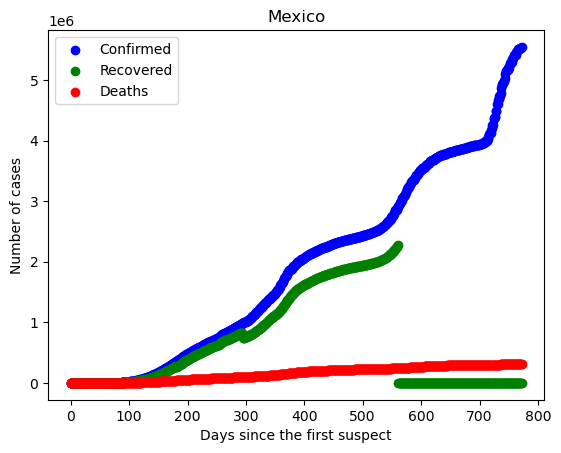

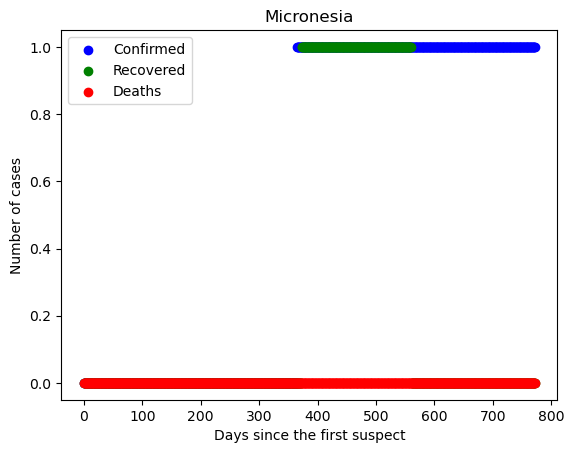

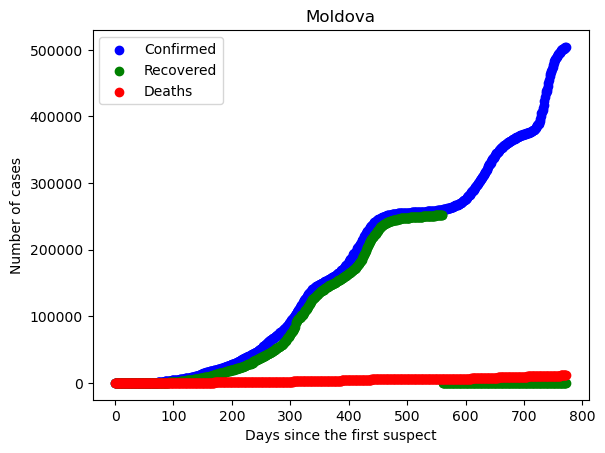

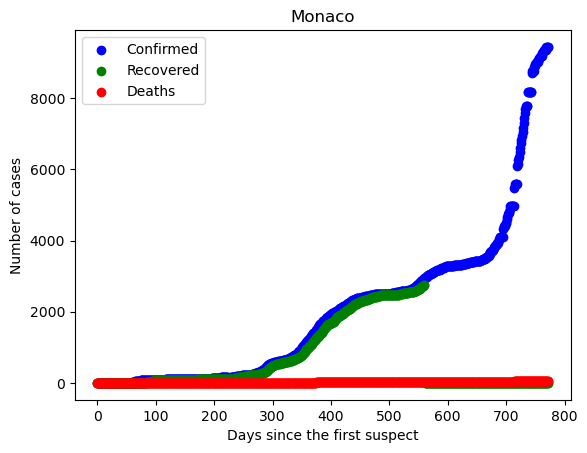

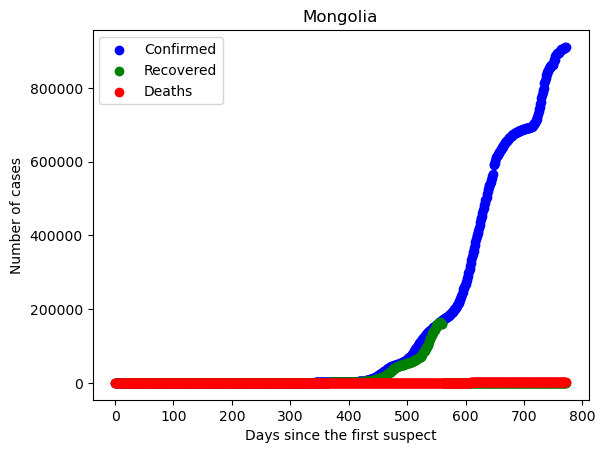

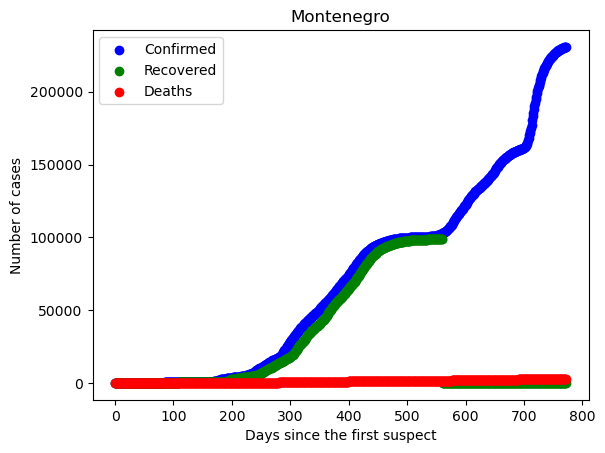

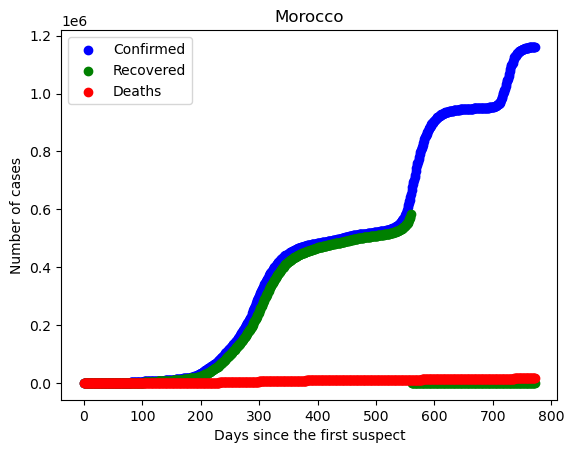

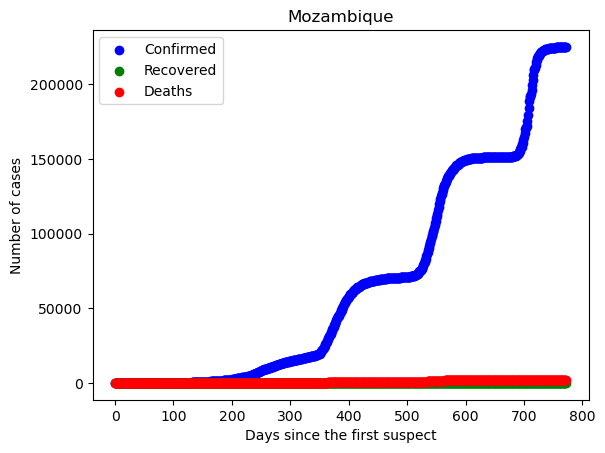

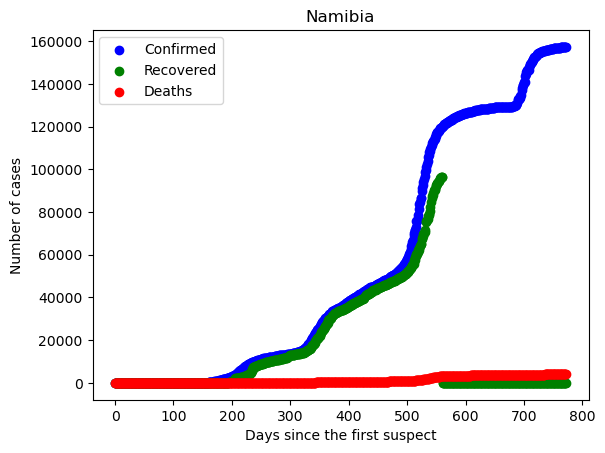

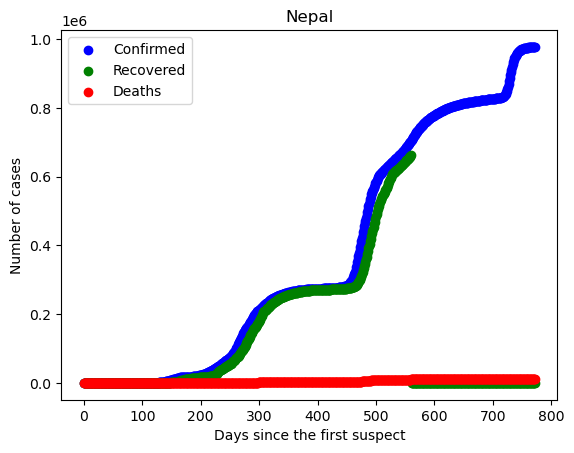

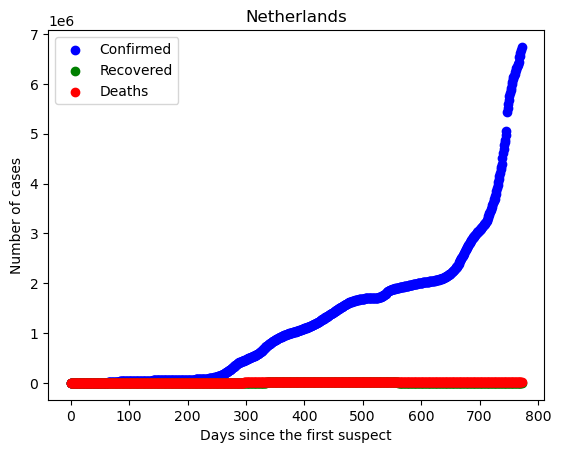

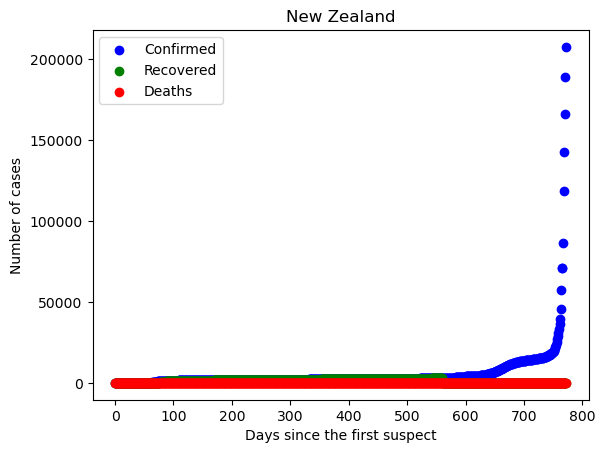

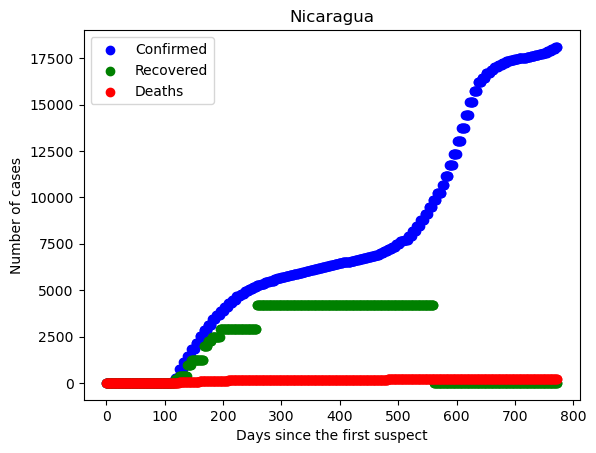

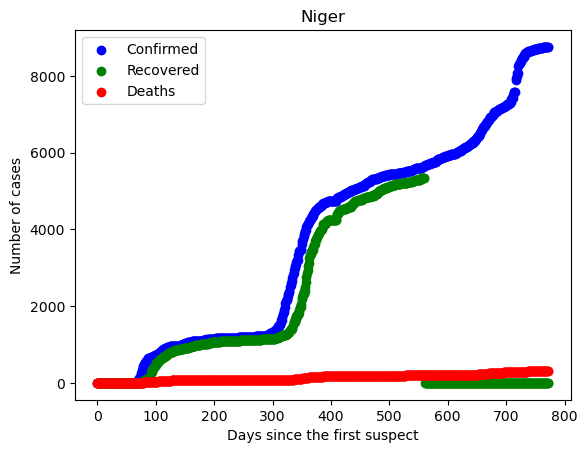

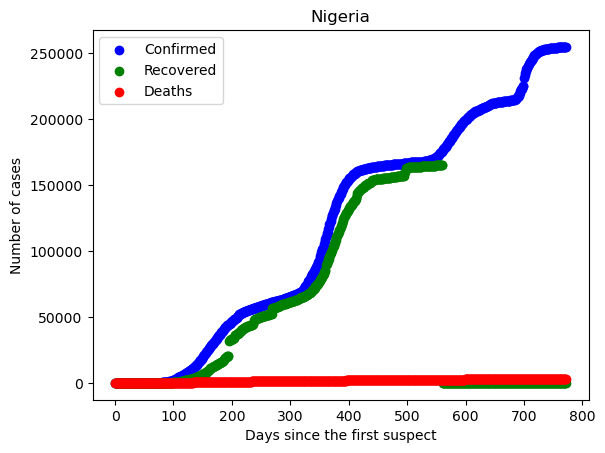

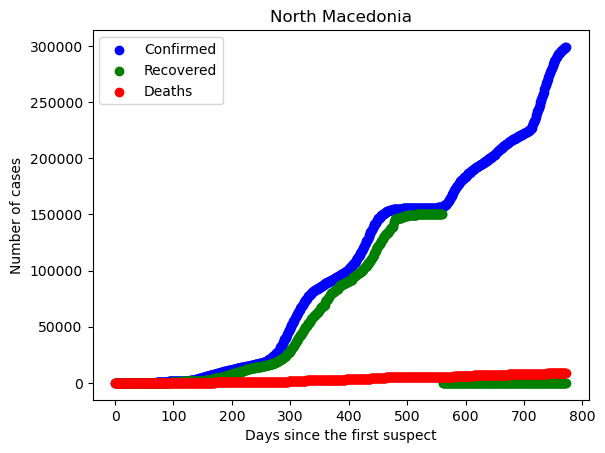

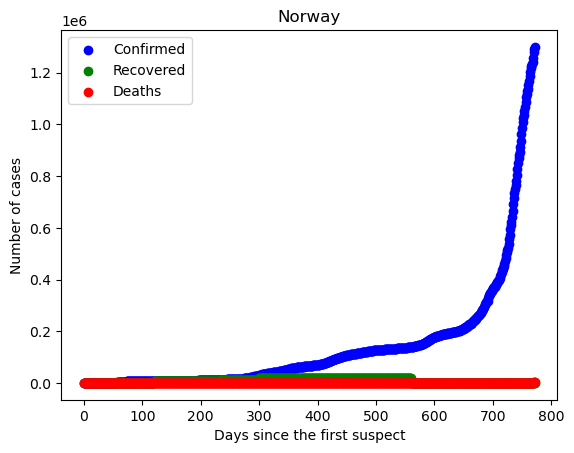

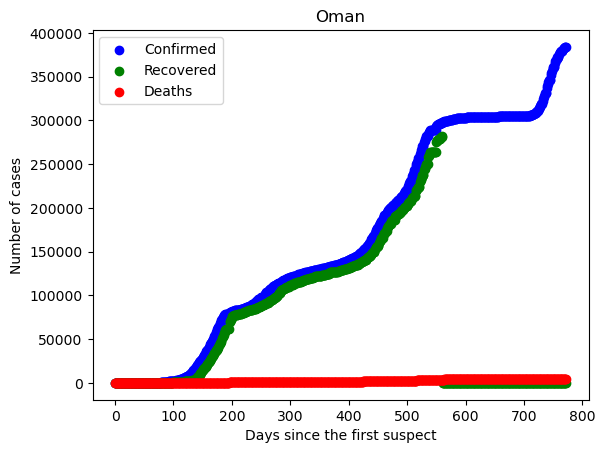

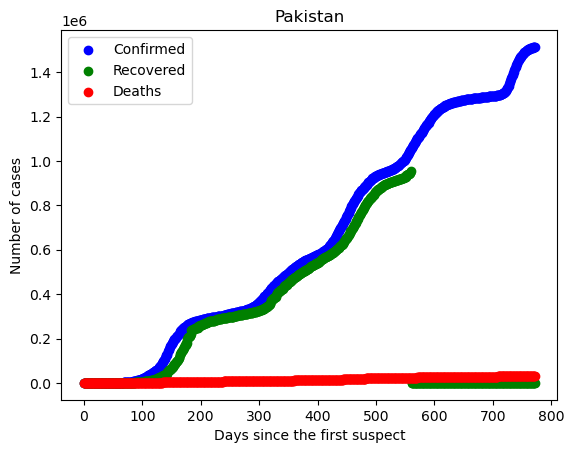

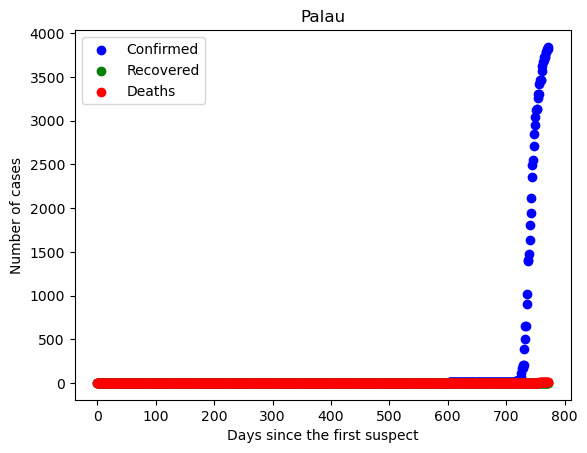

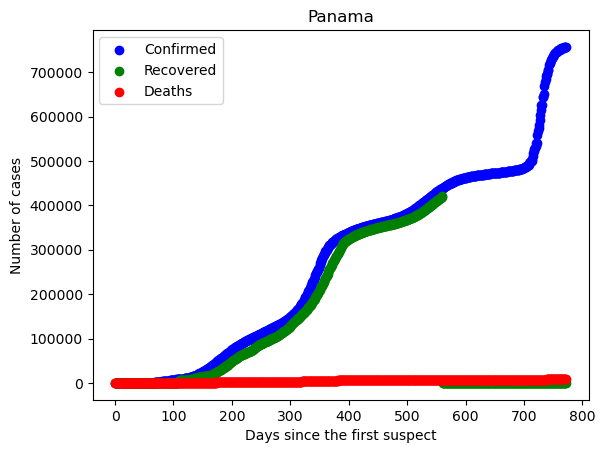

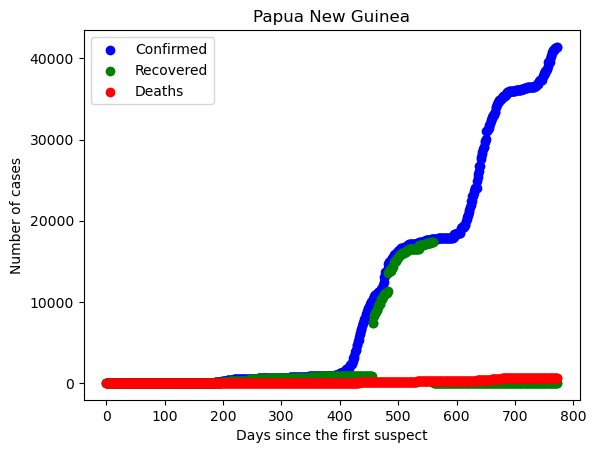

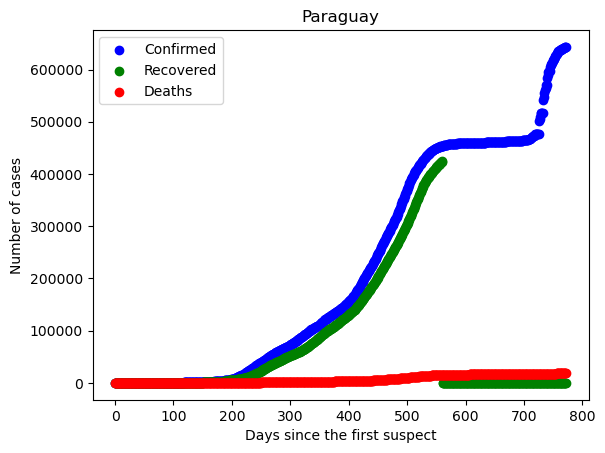

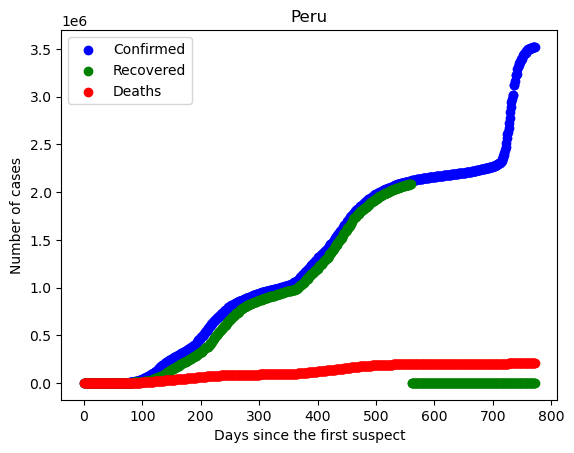

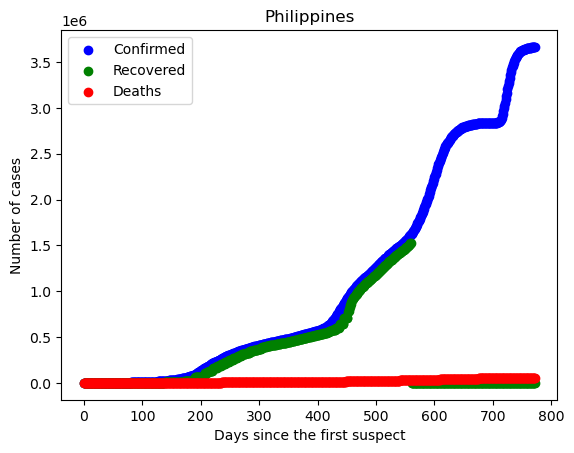

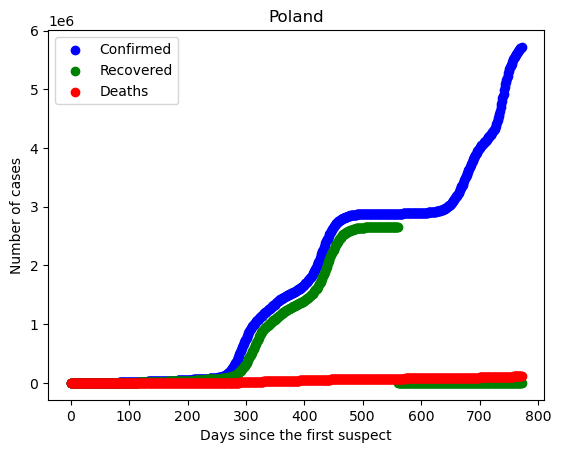

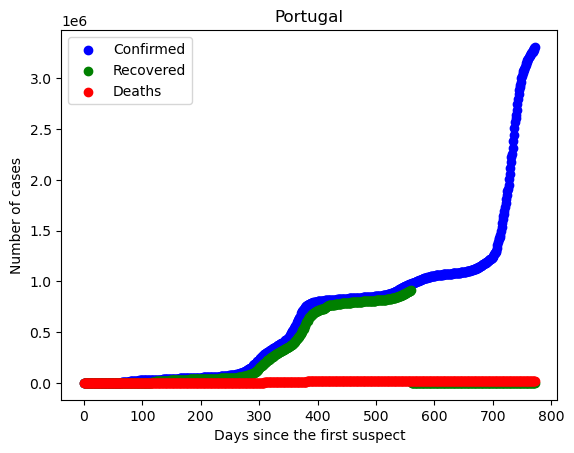

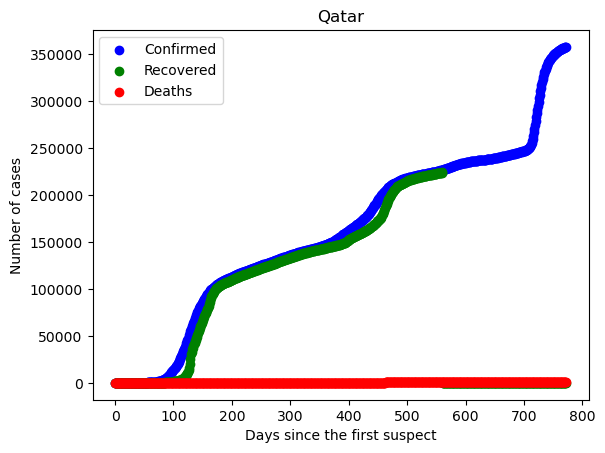

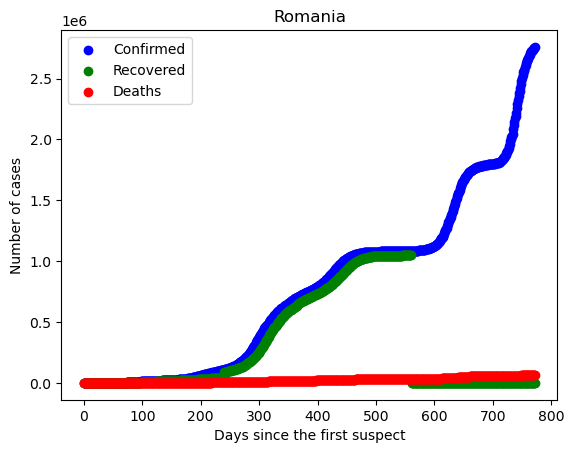

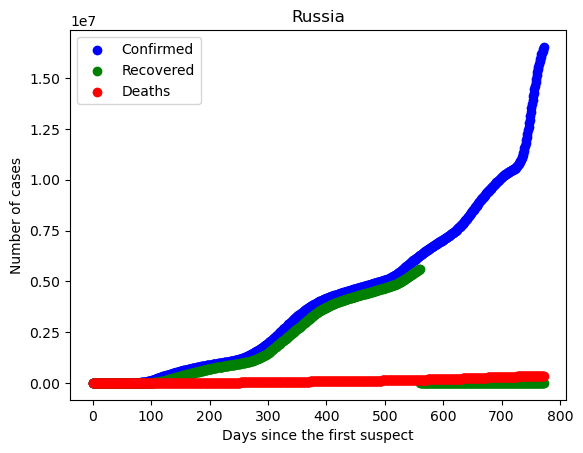

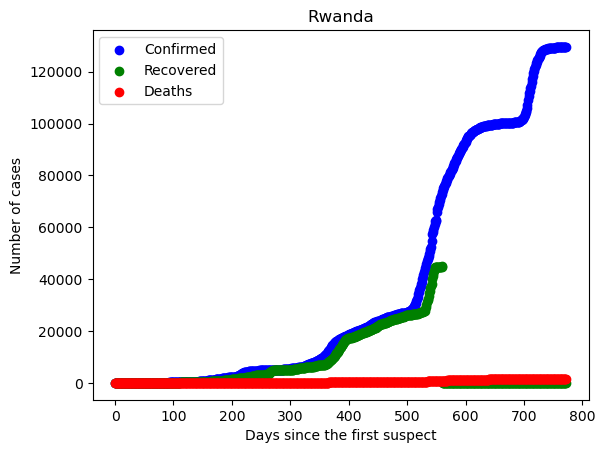

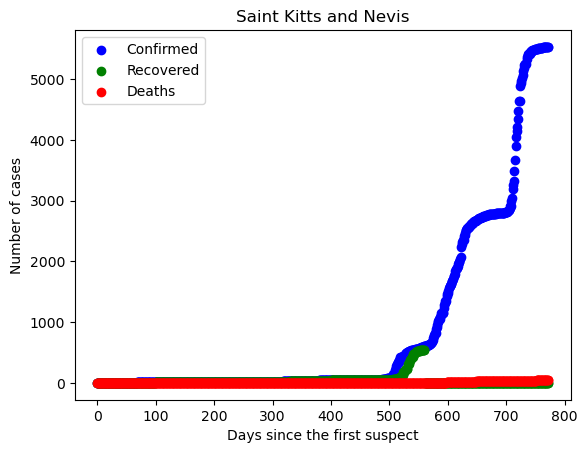

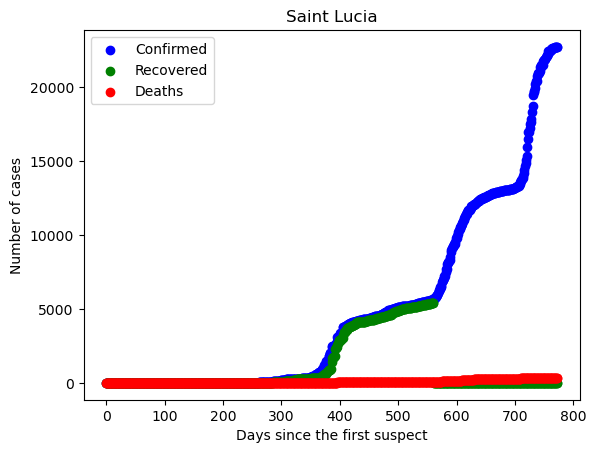

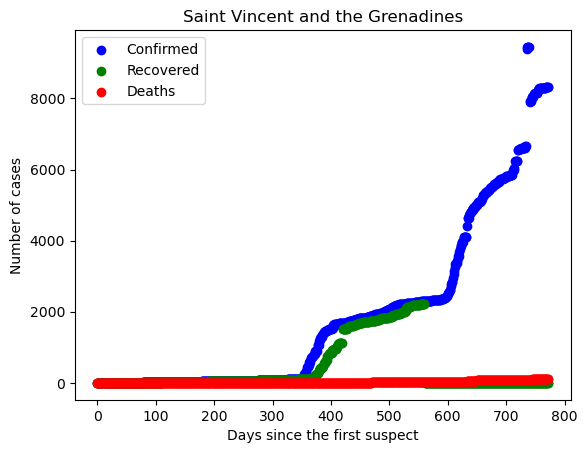

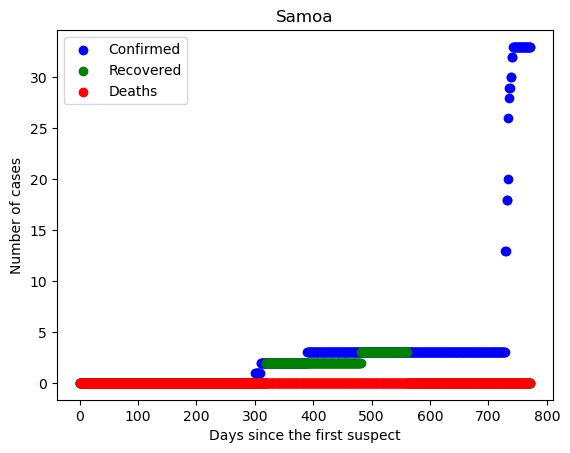

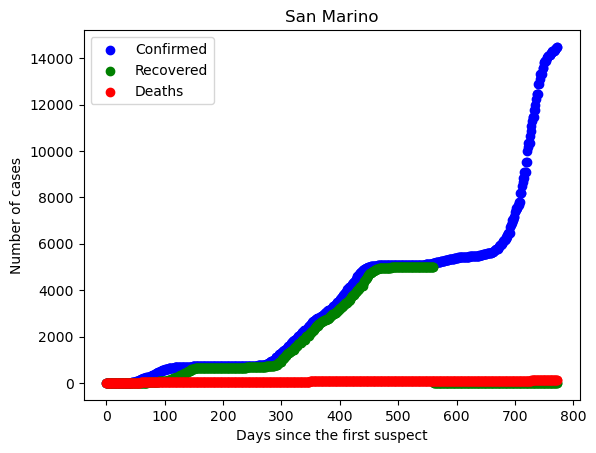

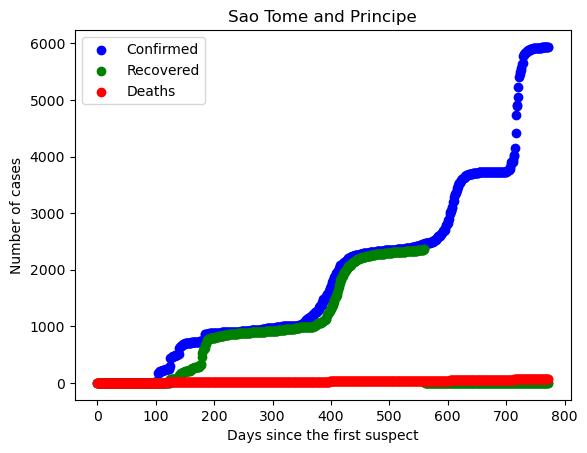

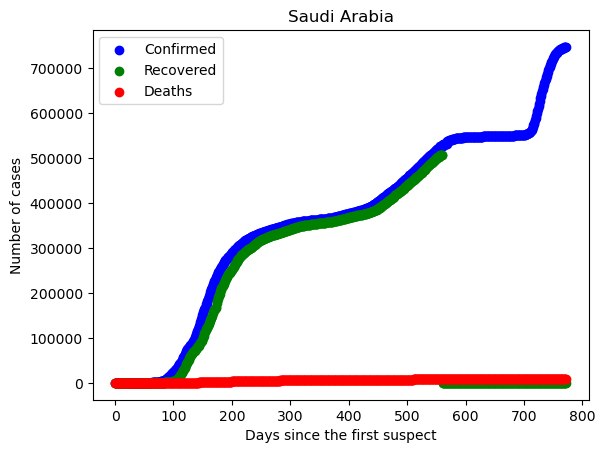

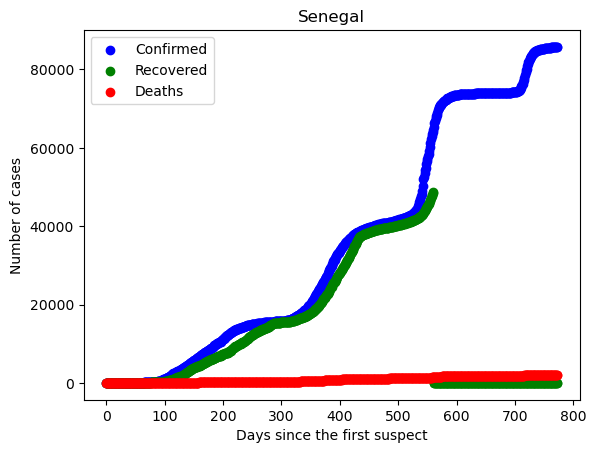

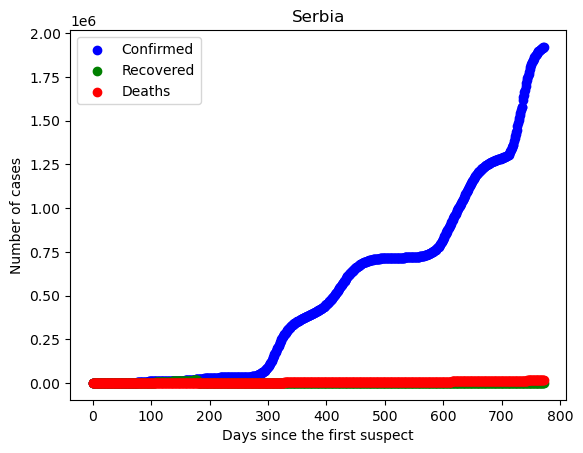

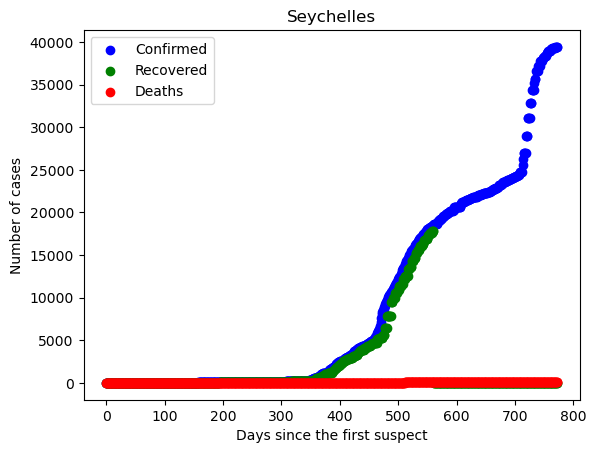

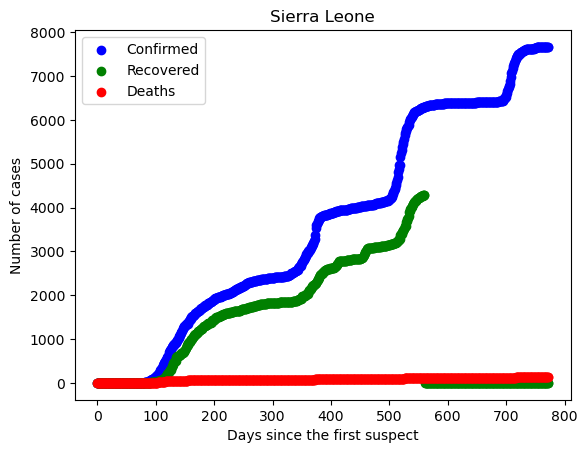

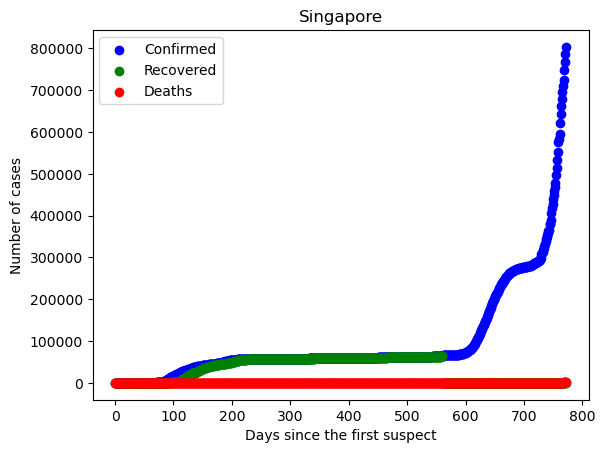

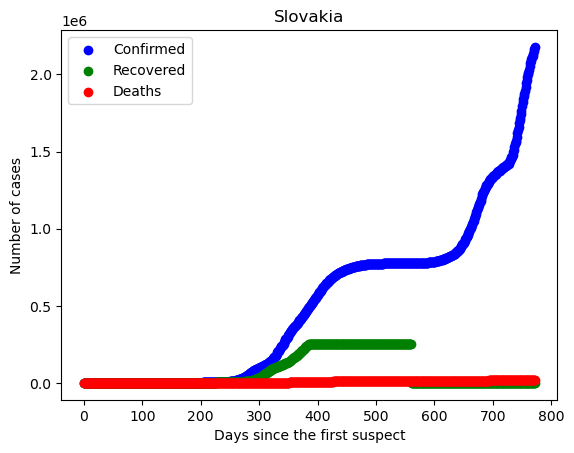

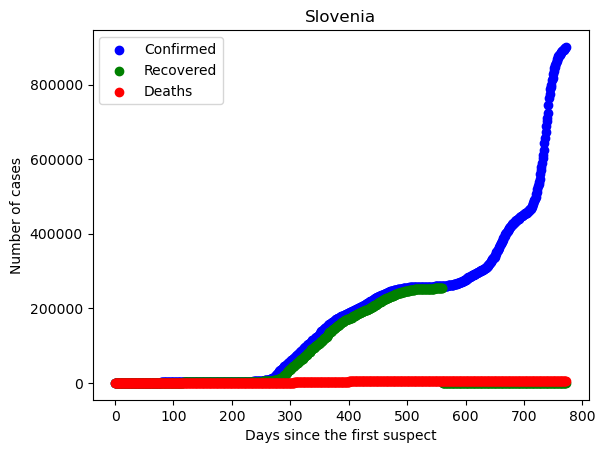

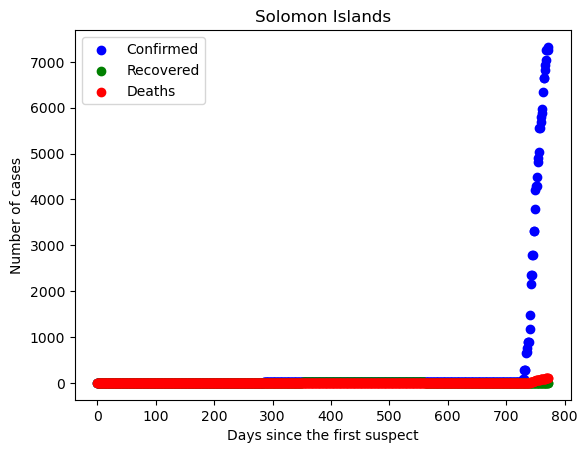

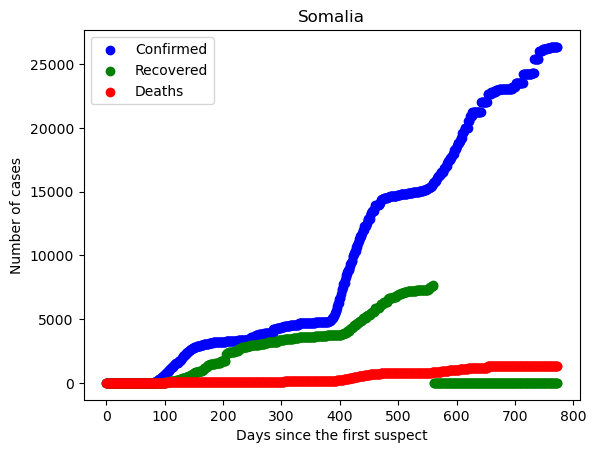

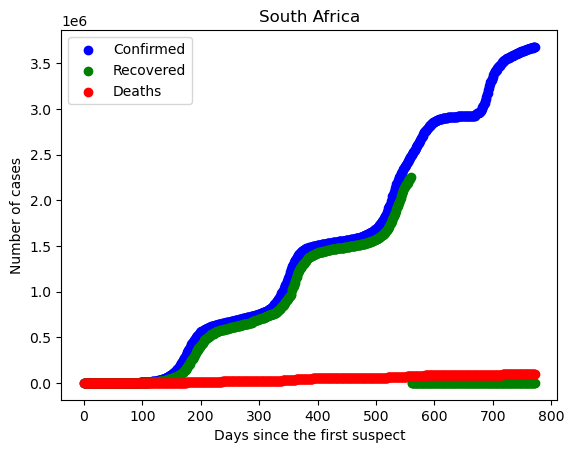

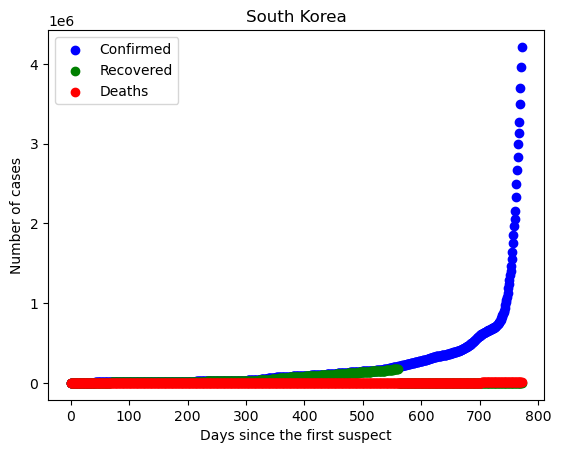

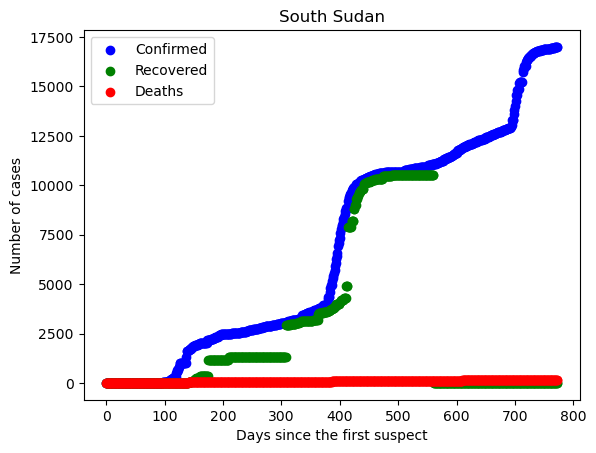

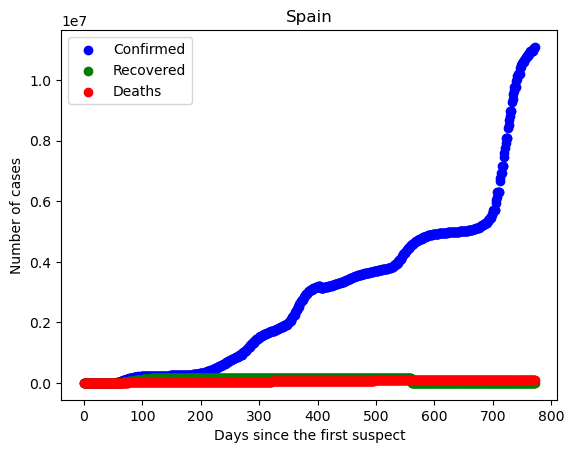

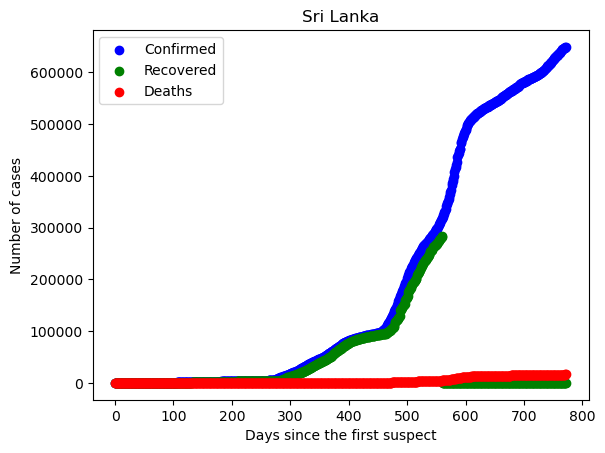

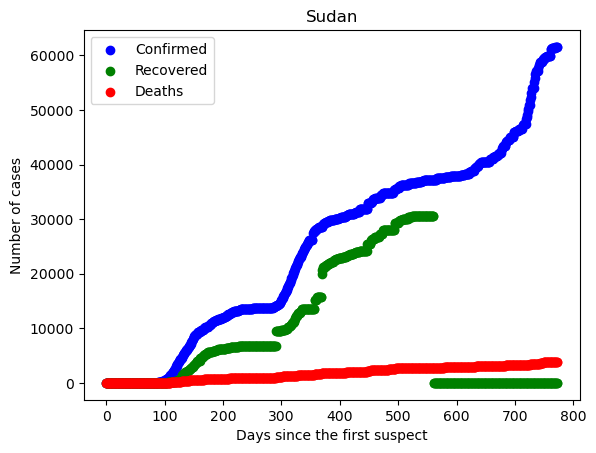

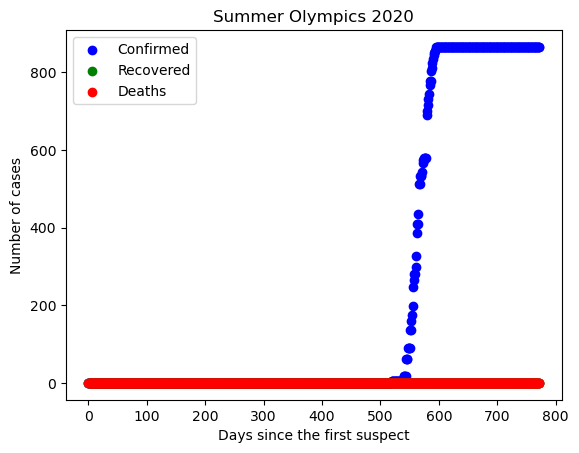

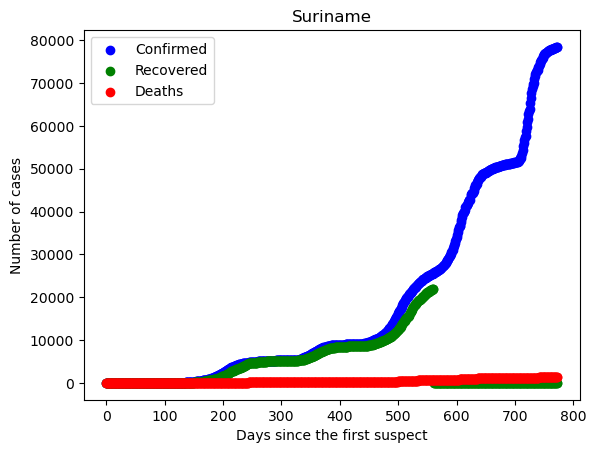

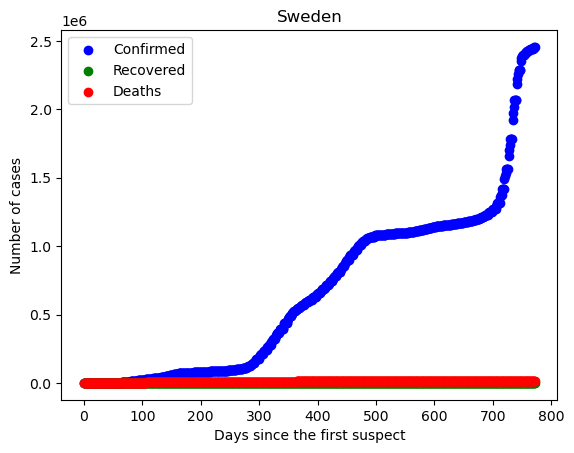

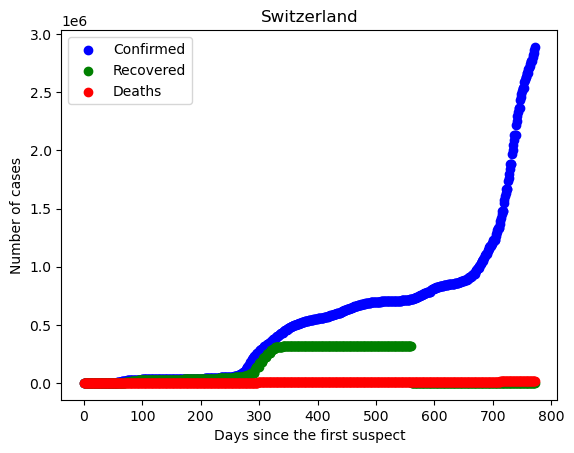

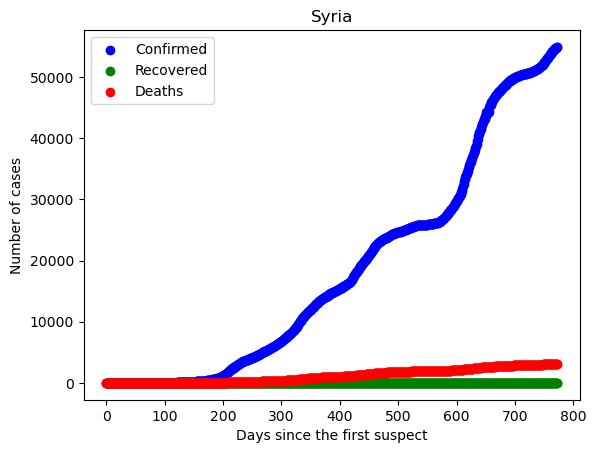

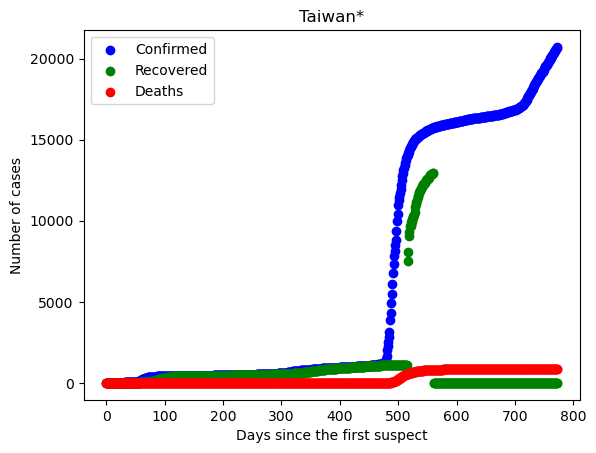

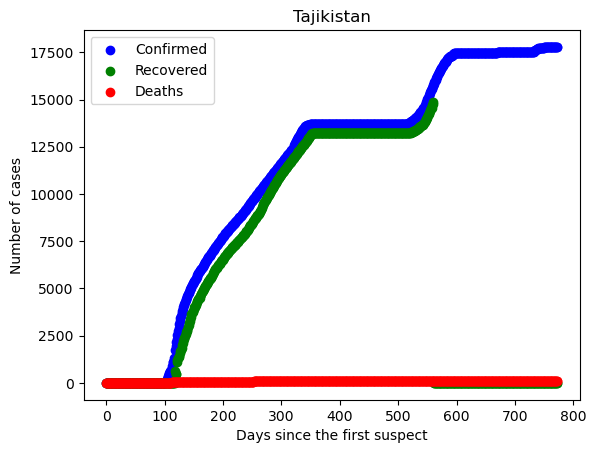

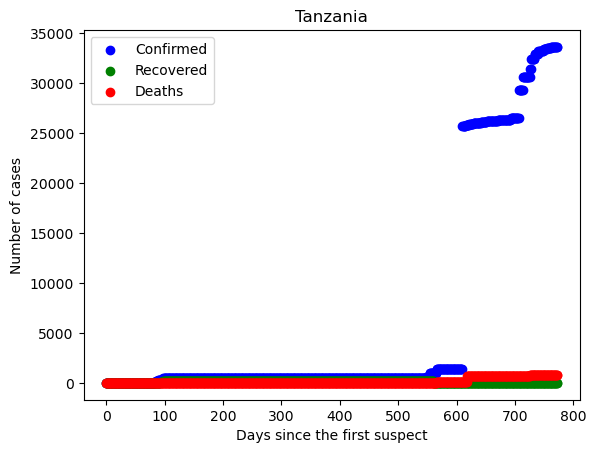

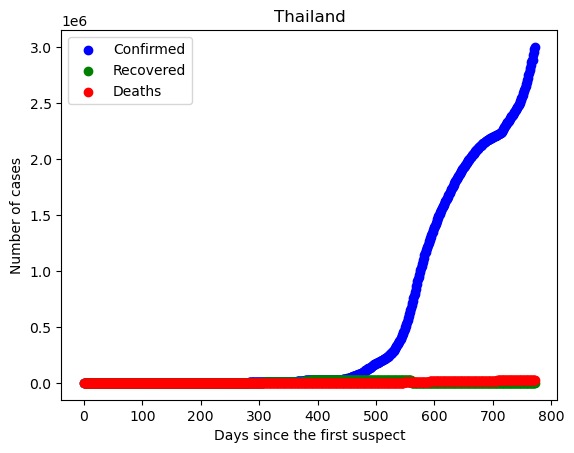

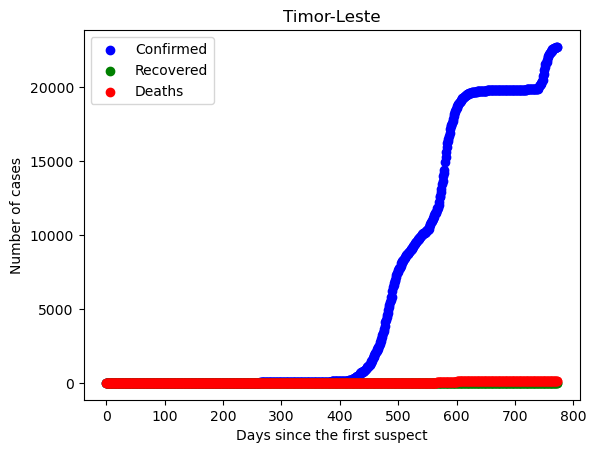

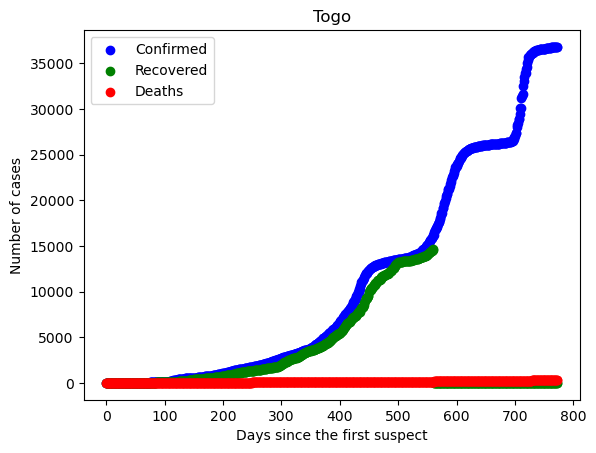

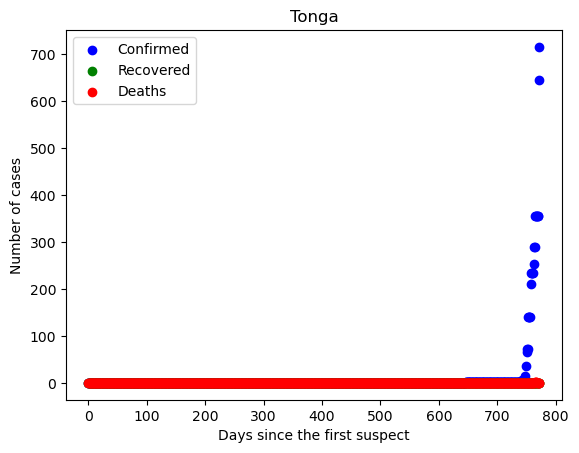

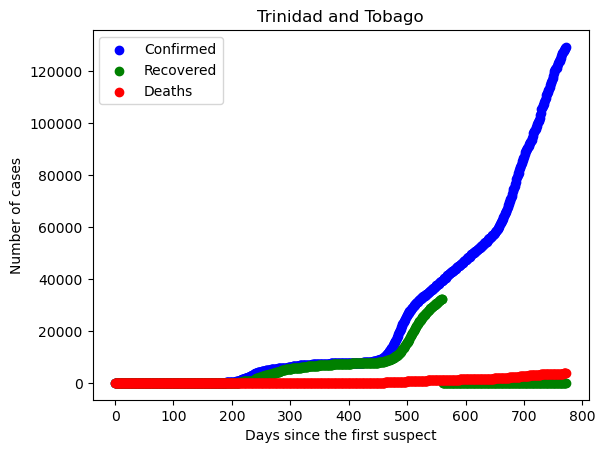

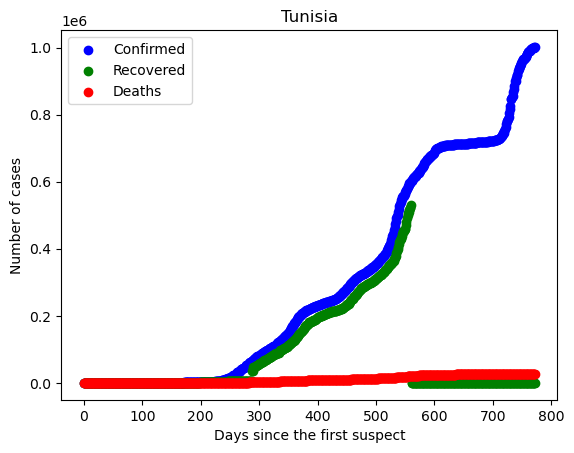

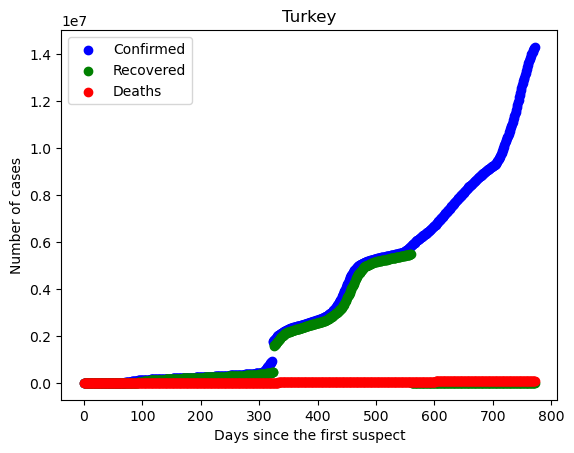

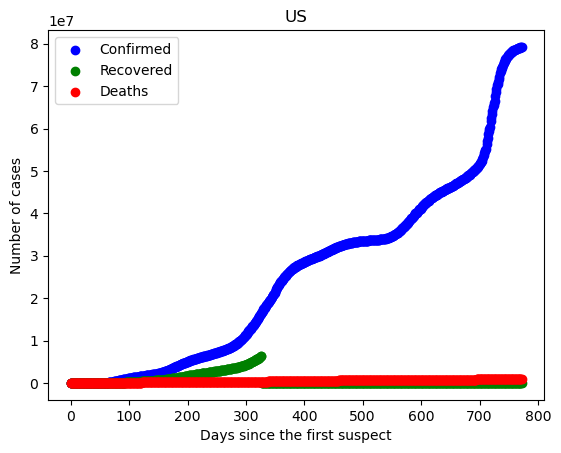

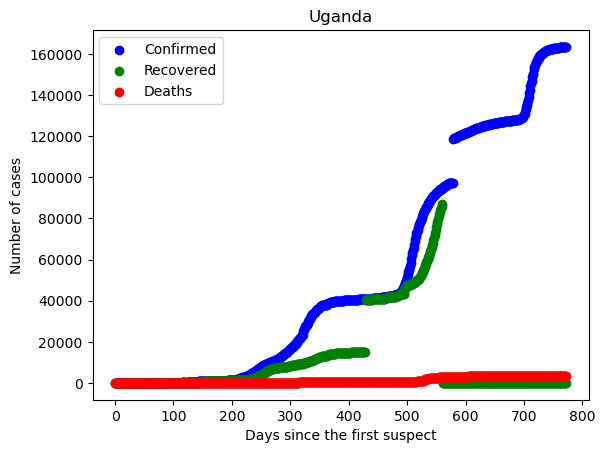

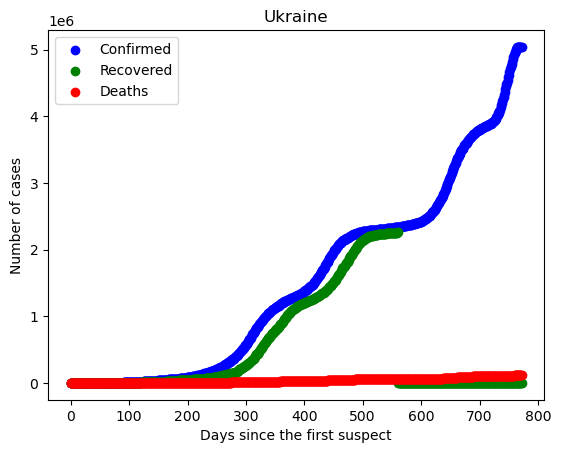

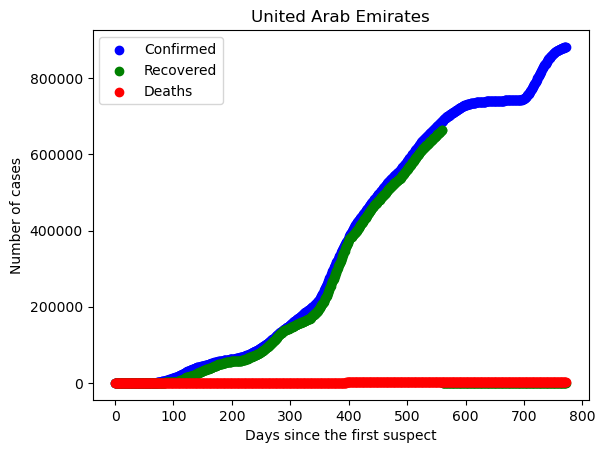

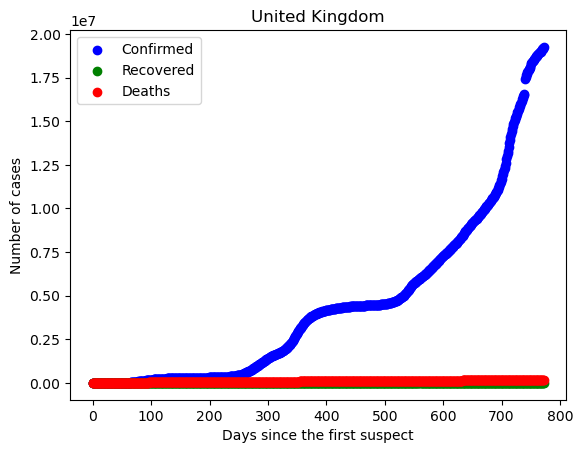

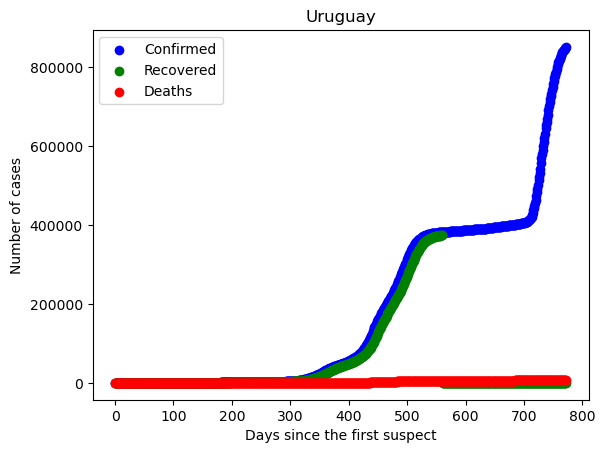

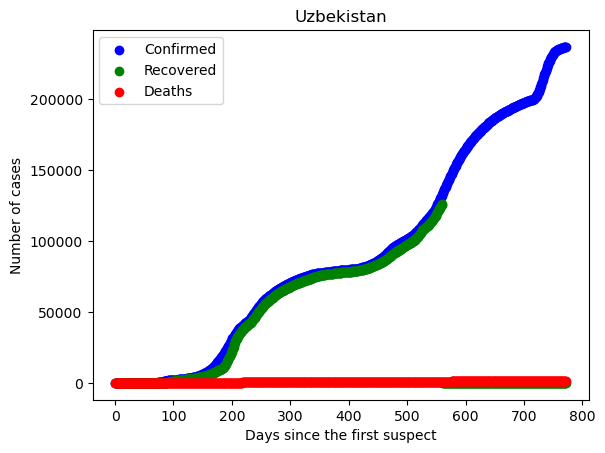

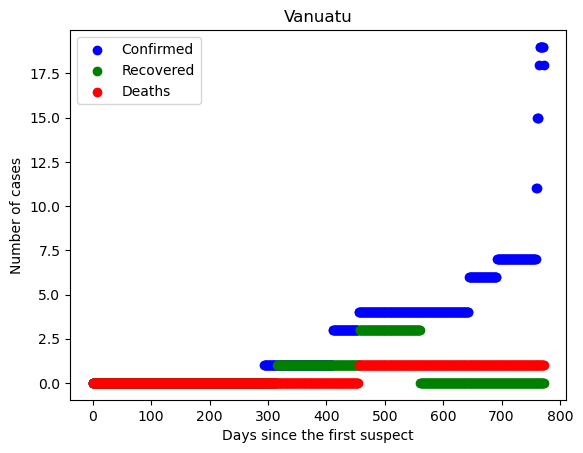

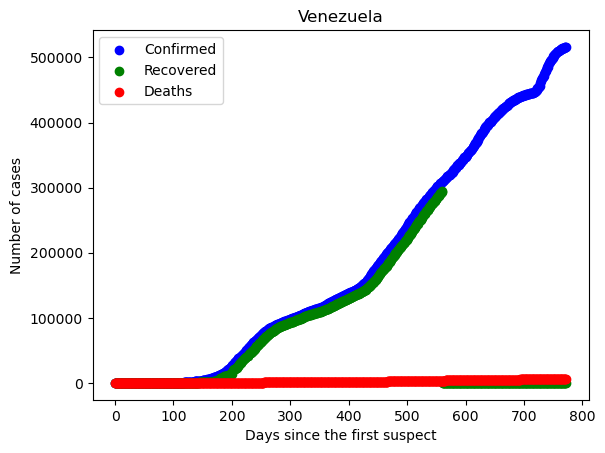

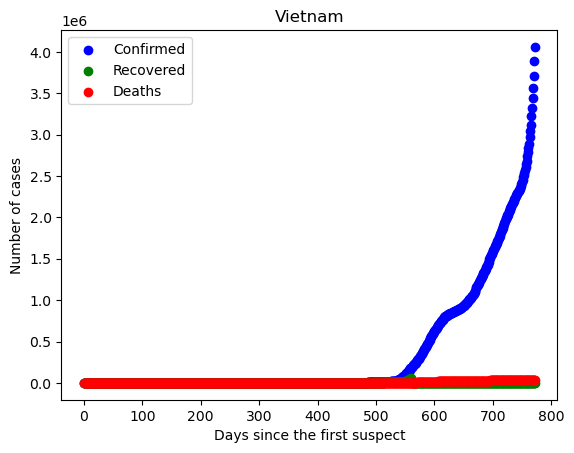

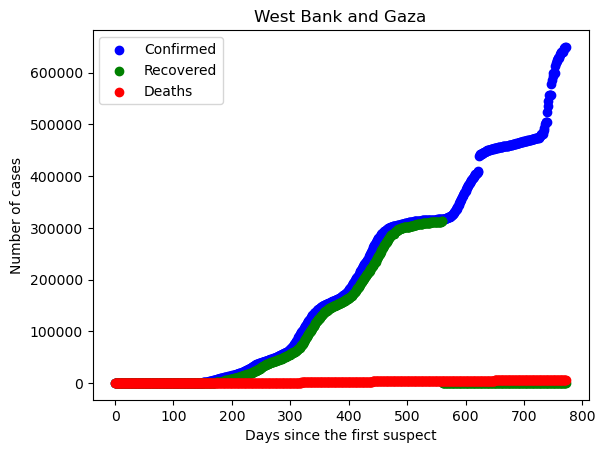

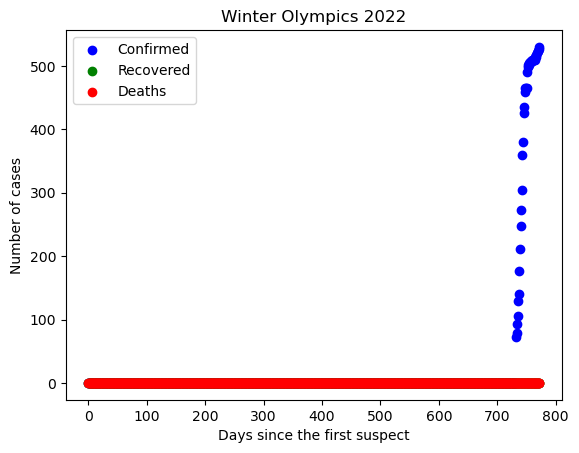

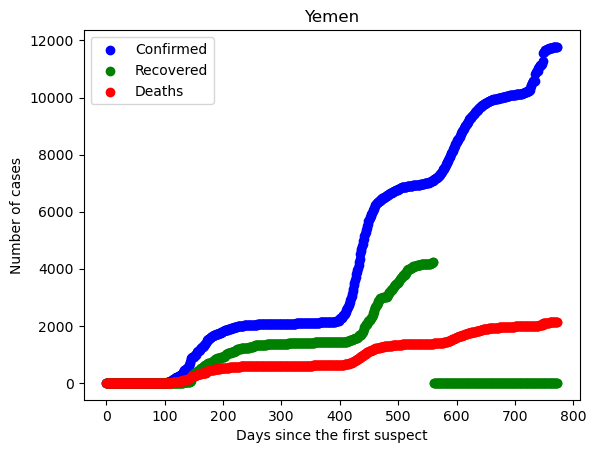

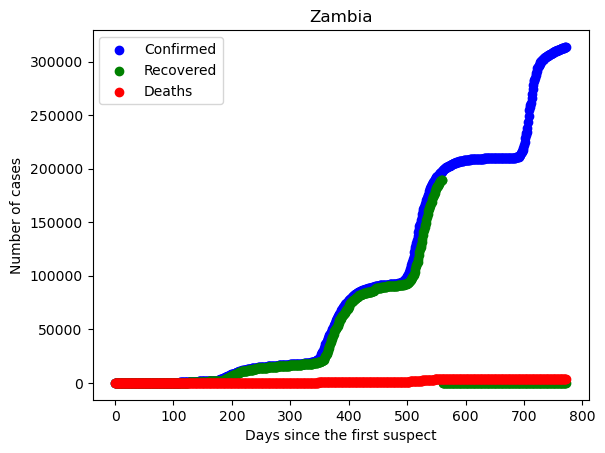

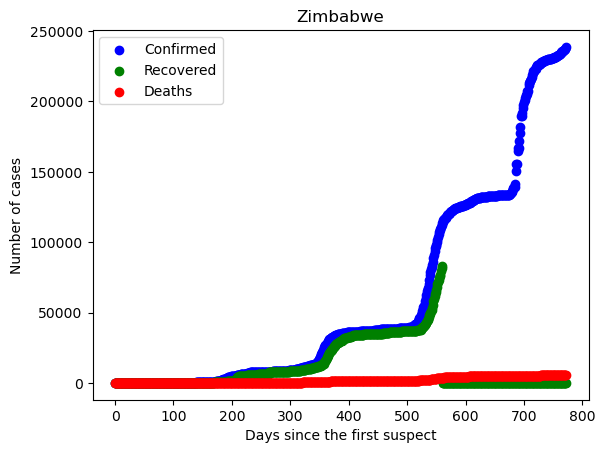

In [13]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()     

In [14]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

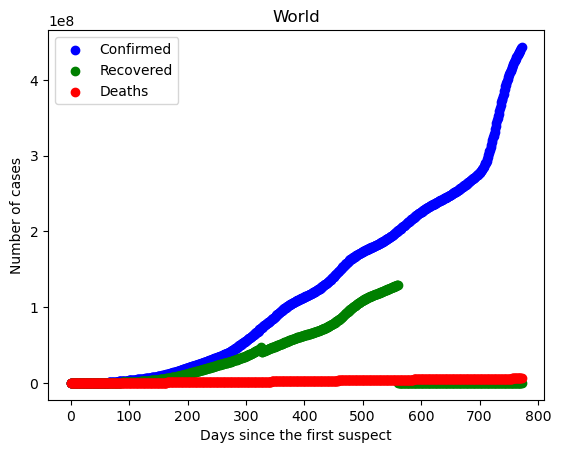

In [15]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()